# Speech Emotion Recognition

# Importing the required libraries

In [3]:
#python
import os

#package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display
import scipy.io.wavfile

#keras
from keras.utils import np_utils

#sklearn
from sklearn.preprocessing import LabelEncoder

from scipy import signal
from tqdm import tqdm_notebook as tqdm

Using TensorFlow backend.


# Importing dataset 

In [4]:
#Data directory
dir_list=os.listdir('E:/SER/audio/')
dir_list.sort()
print(dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


# Pre-processing

In [5]:
#create Dataframe
ravdess_db=pd.DataFrame(columns=['path','source','actor','gender','emotion','emotion_lb'])
count=0
for i in dir_list:
    file_list=os.listdir('E:/SER/audio/'+i)
    for f in file_list:
        nm=f.split('.')[0].split('-')
        path='E:/SER/audio/'+i+'/'+f
        actor=int(nm[-1])
        emotion=int(nm[2])
        source="Ravdess"
            
        if int(actor)%2==0:
            gender="female"
        else:
            gender="male"
            
        if nm[3]=='01':
            intensity=0
        else:
            intensity=1
            
        if nm[4]=='01':
            statement=0
        else:
            statement=1
            
        if nm[5]=='01':
            repeat=0
        else:
            repeat=1
            
        if emotion==1:
            lb="neutral"
        elif emotion==2:
            lb="calm"
        elif emotion==3:
            lb="happy"
        elif emotion==4:
            lb="sad"
        elif emotion==5:
            lb="angry"
        elif emotion==6:
            lb="fearful"
        elif emotion==7:
            lb="disgust"
        elif emotion==8:
            lb="surprised"
        else:
            lb="none"
            
        ravdess_db.loc[count]=[path,source,actor,gender,emotion,lb]
        count+=1

In [6]:
print(len(ravdess_db))

1440


In [7]:
ravdess_db.sort_values(by='path',inplace=True)
ravdess_db.index=range(len(ravdess_db.index))
ravdess_db.head()

,path,source,actor,gender,emotion,emotion_lb
0,E:/SER/audio/Actor_01/03-01-01-01-01-01-01.wav,Ravdess,1,male,1,neutral
1,E:/SER/audio/Actor_01/03-01-01-01-01-02-01.wav,Ravdess,1,male,1,neutral
2,E:/SER/audio/Actor_01/03-01-01-01-02-01-01.wav,Ravdess,1,male,1,neutral
3,E:/SER/audio/Actor_01/03-01-01-01-02-02-01.wav,Ravdess,1,male,1,neutral
4,E:/SER/audio/Actor_01/03-01-02-01-01-01-01.wav,Ravdess,1,male,2,calm


In [8]:
ravdess_db.to_csv('C:/Users/ayush/Speech Emotion/csv/list.csv')

In [9]:
ravdess_db['split']=np.where((ravdess_db.actor==23) | (ravdess_db.actor==24), 'Test',
                              (np.where((ravdess_db.actor==21) | (ravdess_db.actor==22),'Val', 'Train')))

In [10]:
ravdess_db['split'].value_counts()

Train    1200
Val       120
Test      120
Name: split, dtype: int64

In [11]:
ravdess_db.shape

(1440, 7)

In [12]:
ravdess_db.emotion_lb.value_counts()

surprised    192
happy        192
angry        192
calm         192
disgust      192
fearful      192
sad          192
neutral       96
Name: emotion_lb, dtype: int64

### Changing Calm to Neutral

In [13]:
ravdess_db.loc[ravdess_db.emotion_lb=='calm',['emotion','emotion_lb']]=1,'neutral'

In [14]:
ravdess_db.emotion_lb.value_counts()

neutral      288
surprised    192
happy        192
angry        192
disgust      192
fearful      192
sad          192
Name: emotion_lb, dtype: int64

In [15]:
dataset_db=ravdess_db

In [16]:
dataset_db.emotion_lb=dataset_db.gender+"_"+dataset_db.emotion_lb

In [17]:
dataset_db.to_csv('C:/Users/ayush/Speech Emotion/csv/list2.csv')

In [18]:
dataset_db.head()

,path,source,actor,gender,emotion,emotion_lb,split
0,E:/SER/audio/Actor_01/03-01-01-01-01-01-01.wav,Ravdess,1,male,1,male_neutral,Train
1,E:/SER/audio/Actor_01/03-01-01-01-01-02-01.wav,Ravdess,1,male,1,male_neutral,Train
2,E:/SER/audio/Actor_01/03-01-01-01-02-01-01.wav,Ravdess,1,male,1,male_neutral,Train
3,E:/SER/audio/Actor_01/03-01-01-01-02-02-01.wav,Ravdess,1,male,1,male_neutral,Train
4,E:/SER/audio/Actor_01/03-01-02-01-01-01-01.wav,Ravdess,1,male,1,male_neutral,Train


In [19]:
dataset_db.emotion_lb.value_counts()

male_neutral        144
female_neutral      144
male_disgust         96
female_fearful       96
female_disgust       96
female_angry         96
male_sad             96
female_surprised     96
male_surprised       96
male_happy           96
male_fearful         96
female_happy         96
male_angry           96
female_sad           96
Name: emotion_lb, dtype: int64

# Plotting the audio file's waveform

In [20]:
sampling_rate = 44100

In [21]:
filename = ravdess_db.path[0]
print (filename)

E:/SER/audio/Actor_01/03-01-01-01-01-01-01.wav


In [22]:
samples, sample_rate = librosa.load(filename, res_type='kaiser_fast',sr=sampling_rate)
sample_rate, samples.shape

(44100, (145676,))

In [23]:
ipd.Audio(samples,rate=sample_rate)

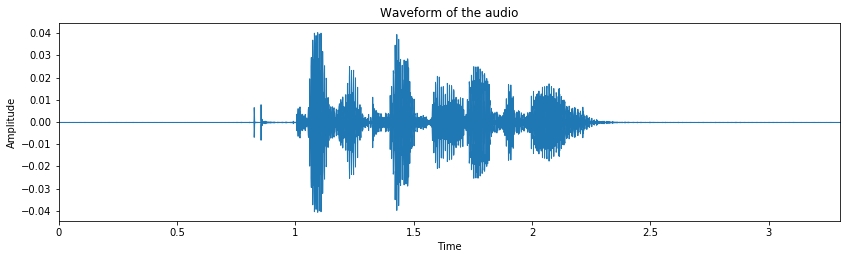

In [24]:
# Plotting Wave Form
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

### Trim the Audio


In [25]:
samples_trim, index = librosa.effects.trim(samples,top_db=25)
samples_trim.shape, index

((55296,), array([44032, 99328]))

In [26]:
ipd.Audio(samples_trim,rate=sample_rate)

In [27]:
Difference_in_length = len(samples)-len(samples_trim)
Difference_in_length

90380

In [28]:
Difference_in_duration = librosa.get_duration(samples)-librosa.get_duration(samples_trim)
Difference_in_duration

4.098866213151927

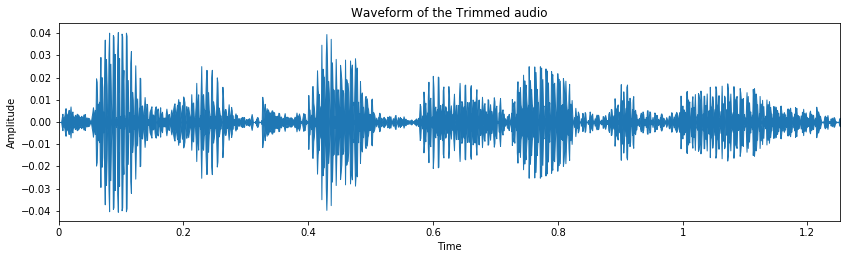

In [29]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Trimmed audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples_trim, sr=sample_rate)

#### Wiener Filter to remove Noise



In [30]:
sample_weiner = scipy.signal.wiener(samples_trim)
len(sample_weiner)

55296

In [31]:
ipd.Audio(sample_weiner,rate=sample_rate)

In [32]:
Diff_noise = sample_weiner-samples_trim
ipd.Audio(Diff_noise,rate=sample_rate)

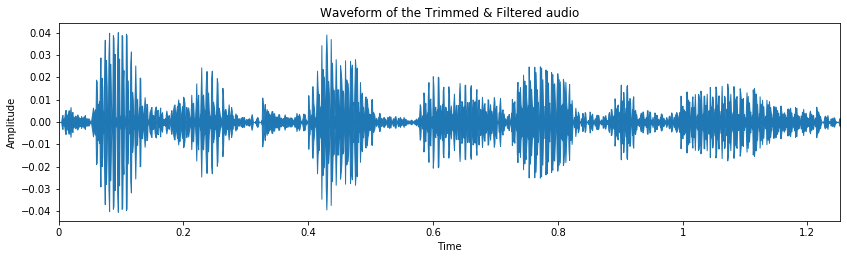

In [33]:
# Plotting Wave Form 
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Trimmed & Filtered audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(sample_weiner, sr=sample_rate)

#### Waveform of the noise in the audio

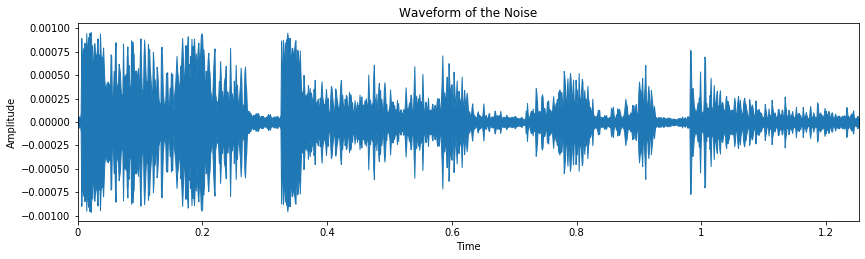

In [34]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Noise')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(Diff_noise, sr=sample_rate)

In [35]:
dataset_db.index = range(len(dataset_db.index))

In [36]:
dataset_db.shape

(1440, 7)

# Feature Extraction

In [37]:
audio_duration=3
sampling_rate=44100
input_length=sampling_rate * audio_duration
n_mfcc = 20

In [38]:
data_sample = np.zeros(input_length)
MFCC = librosa.feature.mfcc(data_sample, sr=sampling_rate, n_mfcc=n_mfcc)

In [39]:
MFCC.shape

(20, 259)

In [40]:
dataset_db.split.value_counts()

Train    1200
Val       120
Test      120
Name: split, dtype: int64

In [41]:


signal, sample_rate = librosa.load(dataset_db.path[0], res_type='kaiser_fast',sr=44100)
signal,index = librosa.effects.trim(signal,top_db = 25)
signal = scipy.signal.wiener(signal)

if len(signal) > input_length:
    signal = signal[0:input_length]
elif  input_length > len(signal):
    max_offset = input_length - len(signal)  
    signal = np.pad(signal, (0, max_offset), "constant")
    


In [42]:
signal = np.array(signal).reshape(-1,1)

In [43]:
signal.shape

(132300, 1)

In [44]:
audios= np.empty(shape=(dataset_db.shape[0],128, MFCC.shape[1], 1))

count=0
for i in tqdm(range(len(dataset_db))):
    signal, sample_rate = librosa.load(dataset_db.path[i], res_type='kaiser_fast',sr=sampling_rate)
    signal,index = librosa.effects.trim(signal,top_db = 25)
    signal = scipy.signal.wiener(signal)
    
    if len(signal) > input_length:
        signal = signal[0:input_length]
    elif  input_length > len(signal):
        max_offset = input_length - len(signal)  
        signal = np.pad(signal, (0, max_offset), "constant")

    melspec = librosa.feature.melspectrogram(signal, sr=sample_rate, n_mels=128,n_fft=2048,hop_length=512)   
    logspec = librosa.amplitude_to_db(melspec)
    logspec = np.expand_dims(logspec, axis=-1)
    audios[count,] = logspec 
    count+=1

C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\scipy\signal\signaltools.py:974: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\scipy\signal\signaltools.py:974: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


In [45]:
audios.shape

(1440, 128, 259, 1)

In [46]:
import h5py
with h5py.File('Ravdess_audio_Mel_spec.h5', 'w') as hf:
    hf.create_dataset("Ravdess_audio_Mel_spec",  data=audios)

In [47]:
import h5py
with h5py.File('Ravdess_audio_Mel_spec.h5', 'r') as hf:
  audios = hf['Ravdess_audio_Mel_spec'][:]

### Plotting Mel Power Spectrogram

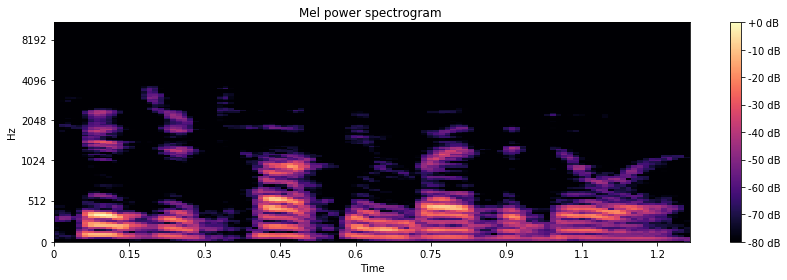

In [48]:
S_sample = librosa.feature.melspectrogram(sample_weiner, sr=sample_rate, n_mels=128,n_fft=2048,hop_length=512)

log_S_sample = librosa.amplitude_to_db(S_sample, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S_sample, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

### Mel-frequency cepstral coefficients(MFCCs)

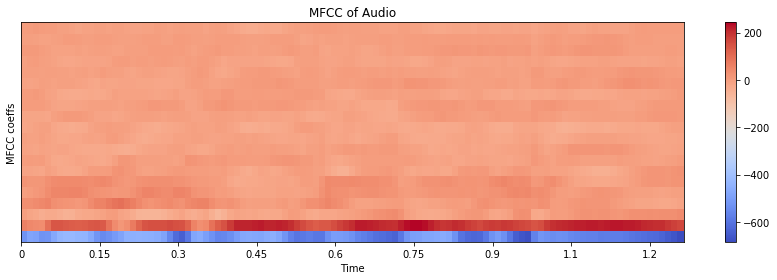

In [49]:
mfccs = librosa.feature.mfcc(sample_weiner, sr=sample_rate)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC of Audio')
plt.colorbar()
plt.tight_layout()

# Dividing The data into train and test

In [50]:
x_train=audios[(dataset_db['split']=='Train')]
y_train=dataset_db.emotion_lb[(dataset_db['split']=='Train')]

print(x_train.shape,y_train.shape)

(1200, 128, 259, 1) (1200,)


In [51]:
x_test=audios[(dataset_db['split']=='Val')]
y_test=dataset_db.emotion_lb[(dataset_db['split']=='Val')]

print(x_test.shape,y_test.shape)

(120, 128, 259, 1) (120,)


In [52]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [53]:
lb=LabelEncoder()
y_train=np_utils.to_categorical(lb.fit_transform(y_train))
y_test=np_utils.to_categorical(lb.fit_transform(y_test))

In [54]:
x_traincnn=x_train
x_testcnn=x_test

In [55]:
x_traincnn.shape,x_testcnn.shape,y_train.shape,y_test.shape

((1200, 128, 259, 1), (120, 128, 259, 1), (1200, 14), (120, 14))

# Building the model

In [56]:
from keras.models import Sequential
from keras.layers import Conv1D,Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPooling1D,MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

In [57]:
num_classes=len(np.unique(np.argmax(y_train,1)))
input_shape=x_traincnn.shape[1:]
learning_rate=0.0001
decay = 1e-6
momentum=0.9

In [58]:
input_shape

(128, 259, 1)

In [59]:
model=Sequential(name='Audio_CNN_2D')

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',data_format='channels_last',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(4,4),strides=(4,4)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(4,4),strides=(4,4)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(4,4),strides=(4,4)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=num_classes,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [60]:
#Model Compilation
from keras import optimizers
opt=optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 259, 128)     1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 259, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 259, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 129, 128)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 129, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 129, 64)       73792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 129, 64)       256       
__________

# Training the model

In [62]:
#Train Config
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
batch_size = 16
num_epochs = 100

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
mcp_save = ModelCheckpoint('Audio_2DCNN_4L.h5', save_best_only=True, monitor='val_categorical_accuracy', mode='max')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=batch_size, epochs=num_epochs,validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])


Instructions for updating:
Use tf.cast instead.
Train on 1200 samples, validate on 120 samples
Epoch 1/100
1200/1200 [==============================] - ETA: 11:08 - loss: 7.7123 - categorical_accuracy: 0.0000e+0 - ETA: 7:01 - loss: 6.5318 - categorical_accuracy: 0.0312    - ETA: 5:30 - loss: 5.7073 - categorical_accuracy: 0.08 - ETA: 4:44 - loss: 5.7724 - categorical_accuracy: 0.06 - ETA: 4:16 - loss: 5.4072 - categorical_accuracy: 0.08 - ETA: 3:57 - loss: 5.2689 - categorical_accuracy: 0.08 - ETA: 3:42 - loss: 5.1515 - categorical_accuracy: 0.07 - ETA: 3:30 - loss: 5.0110 - categorical_accuracy: 0.08 - ETA: 3:20 - loss: 4.9240 - categorical_accuracy: 0.09 - ETA: 3:11 - loss: 4.8690 - categorical_accuracy: 0.08 - ETA: 3:04 - loss: 4.7970 - categorical_accuracy: 0.09 - ETA: 2:59 - loss: 4.6536 - categorical_accuracy: 0.09 - ETA: 2:53 - loss: 4.5357 - categorical_accuracy: 0.10 - ETA: 2:49 - loss: 4.4496 - categorical_accuracy: 0.09 - ETA: 2:44 - loss: 4.3117 - categorical_accuracy: 0.10

1200/1200 [==============================] - ETA: 4:43 - loss: 1.9938 - categorical_accuracy: 0.31 - ETA: 4:40 - loss: 2.3126 - categorical_accuracy: 0.18 - ETA: 4:35 - loss: 2.3475 - categorical_accuracy: 0.16 - ETA: 4:31 - loss: 2.4509 - categorical_accuracy: 0.14 - ETA: 4:27 - loss: 2.4943 - categorical_accuracy: 0.15 - ETA: 4:23 - loss: 2.4499 - categorical_accuracy: 0.16 - ETA: 4:19 - loss: 2.4660 - categorical_accuracy: 0.16 - ETA: 4:15 - loss: 2.5071 - categorical_accuracy: 0.17 - ETA: 4:11 - loss: 2.5001 - categorical_accuracy: 0.17 - ETA: 4:08 - loss: 2.4947 - categorical_accuracy: 0.18 - ETA: 4:05 - loss: 2.4640 - categorical_accuracy: 0.20 - ETA: 4:01 - loss: 2.5245 - categorical_accuracy: 0.19 - ETA: 3:57 - loss: 2.4948 - categorical_accuracy: 0.20 - ETA: 3:54 - loss: 2.5238 - categorical_accuracy: 0.20 - ETA: 3:50 - loss: 2.5766 - categorical_accuracy: 0.19 - ETA: 3:46 - loss: 2.5754 - categorical_accuracy: 0.19 - ETA: 3:43 - loss: 2.5646 - categorical_accuracy: 0.19 - ETA

1200/1200 [==============================] - ETA: 3:00 - loss: 2.4898 - categorical_accuracy: 0.06 - ETA: 2:57 - loss: 2.4926 - categorical_accuracy: 0.15 - ETA: 2:52 - loss: 2.3744 - categorical_accuracy: 0.14 - ETA: 2:50 - loss: 2.3295 - categorical_accuracy: 0.18 - ETA: 2:49 - loss: 2.3288 - categorical_accuracy: 0.18 - ETA: 2:47 - loss: 2.3915 - categorical_accuracy: 0.16 - ETA: 2:44 - loss: 2.4120 - categorical_accuracy: 0.16 - ETA: 2:42 - loss: 2.4569 - categorical_accuracy: 0.15 - ETA: 2:40 - loss: 2.4285 - categorical_accuracy: 0.15 - ETA: 2:37 - loss: 2.4446 - categorical_accuracy: 0.15 - ETA: 2:35 - loss: 2.4812 - categorical_accuracy: 0.14 - ETA: 2:33 - loss: 2.4830 - categorical_accuracy: 0.15 - ETA: 2:30 - loss: 2.4452 - categorical_accuracy: 0.17 - ETA: 2:28 - loss: 2.4868 - categorical_accuracy: 0.16 - ETA: 2:25 - loss: 2.4842 - categorical_accuracy: 0.16 - ETA: 2:23 - loss: 2.4977 - categorical_accuracy: 0.16 - ETA: 2:21 - loss: 2.5056 - categorical_accuracy: 0.16 - ETA

1200/1200 [==============================] - ETA: 2:58 - loss: 2.4818 - categorical_accuracy: 0.12 - ETA: 2:52 - loss: 2.4409 - categorical_accuracy: 0.21 - ETA: 2:47 - loss: 2.4757 - categorical_accuracy: 0.22 - ETA: 2:47 - loss: 2.5485 - categorical_accuracy: 0.20 - ETA: 2:44 - loss: 2.5218 - categorical_accuracy: 0.18 - ETA: 2:40 - loss: 2.5728 - categorical_accuracy: 0.18 - ETA: 2:37 - loss: 2.5399 - categorical_accuracy: 0.19 - ETA: 2:33 - loss: 2.5288 - categorical_accuracy: 0.20 - ETA: 2:31 - loss: 2.5567 - categorical_accuracy: 0.20 - ETA: 2:28 - loss: 2.5080 - categorical_accuracy: 0.21 - ETA: 2:27 - loss: 2.5211 - categorical_accuracy: 0.19 - ETA: 2:24 - loss: 2.5009 - categorical_accuracy: 0.19 - ETA: 2:21 - loss: 2.5253 - categorical_accuracy: 0.19 - ETA: 2:19 - loss: 2.5435 - categorical_accuracy: 0.19 - ETA: 2:16 - loss: 2.5503 - categorical_accuracy: 0.18 - ETA: 2:14 - loss: 2.5580 - categorical_accuracy: 0.17 - ETA: 2:11 - loss: 2.5437 - categorical_accuracy: 0.17 - ETA

1200/1200 [==============================] - ETA: 2:43 - loss: 2.3046 - categorical_accuracy: 0.12 - ETA: 2:41 - loss: 2.0382 - categorical_accuracy: 0.25 - ETA: 2:41 - loss: 2.0355 - categorical_accuracy: 0.25 - ETA: 2:39 - loss: 2.2127 - categorical_accuracy: 0.20 - ETA: 2:39 - loss: 2.3025 - categorical_accuracy: 0.18 - ETA: 2:37 - loss: 2.3673 - categorical_accuracy: 0.16 - ETA: 2:35 - loss: 2.4058 - categorical_accuracy: 0.16 - ETA: 2:35 - loss: 2.3721 - categorical_accuracy: 0.19 - ETA: 2:34 - loss: 2.3537 - categorical_accuracy: 0.20 - ETA: 2:32 - loss: 2.3826 - categorical_accuracy: 0.20 - ETA: 2:30 - loss: 2.3664 - categorical_accuracy: 0.21 - ETA: 2:28 - loss: 2.3653 - categorical_accuracy: 0.20 - ETA: 2:25 - loss: 2.3433 - categorical_accuracy: 0.21 - ETA: 2:25 - loss: 2.3165 - categorical_accuracy: 0.24 - ETA: 2:22 - loss: 2.3178 - categorical_accuracy: 0.24 - ETA: 2:19 - loss: 2.3197 - categorical_accuracy: 0.23 - ETA: 2:16 - loss: 2.2945 - categorical_accuracy: 0.24 - ETA

1200/1200 [==============================] - ETA: 2:46 - loss: 1.6236 - categorical_accuracy: 0.43 - ETA: 2:45 - loss: 1.9028 - categorical_accuracy: 0.31 - ETA: 2:41 - loss: 1.9713 - categorical_accuracy: 0.33 - ETA: 2:39 - loss: 2.0461 - categorical_accuracy: 0.32 - ETA: 2:36 - loss: 2.1571 - categorical_accuracy: 0.30 - ETA: 2:34 - loss: 2.0974 - categorical_accuracy: 0.30 - ETA: 2:31 - loss: 2.1833 - categorical_accuracy: 0.28 - ETA: 2:29 - loss: 2.2432 - categorical_accuracy: 0.28 - ETA: 2:27 - loss: 2.2459 - categorical_accuracy: 0.29 - ETA: 2:25 - loss: 2.2978 - categorical_accuracy: 0.28 - ETA: 2:23 - loss: 2.2619 - categorical_accuracy: 0.28 - ETA: 2:20 - loss: 2.2832 - categorical_accuracy: 0.28 - ETA: 2:18 - loss: 2.2665 - categorical_accuracy: 0.28 - ETA: 2:16 - loss: 2.2583 - categorical_accuracy: 0.28 - ETA: 2:13 - loss: 2.2604 - categorical_accuracy: 0.27 - ETA: 2:11 - loss: 2.3082 - categorical_accuracy: 0.26 - ETA: 2:09 - loss: 2.3487 - categorical_accuracy: 0.26 - ETA

1200/1200 [==============================] - ETA: 2:55 - loss: 1.8874 - categorical_accuracy: 0.31 - ETA: 2:47 - loss: 2.2469 - categorical_accuracy: 0.28 - ETA: 2:42 - loss: 2.1996 - categorical_accuracy: 0.31 - ETA: 2:39 - loss: 2.1908 - categorical_accuracy: 0.26 - ETA: 2:37 - loss: 2.1933 - categorical_accuracy: 0.26 - ETA: 2:34 - loss: 2.1456 - categorical_accuracy: 0.30 - ETA: 2:32 - loss: 2.1896 - categorical_accuracy: 0.27 - ETA: 2:29 - loss: 2.1672 - categorical_accuracy: 0.27 - ETA: 2:27 - loss: 2.2384 - categorical_accuracy: 0.26 - ETA: 2:27 - loss: 2.2213 - categorical_accuracy: 0.26 - ETA: 2:25 - loss: 2.2038 - categorical_accuracy: 0.26 - ETA: 2:22 - loss: 2.2009 - categorical_accuracy: 0.25 - ETA: 2:20 - loss: 2.1898 - categorical_accuracy: 0.25 - ETA: 2:18 - loss: 2.2007 - categorical_accuracy: 0.25 - ETA: 2:15 - loss: 2.1852 - categorical_accuracy: 0.26 - ETA: 2:13 - loss: 2.1682 - categorical_accuracy: 0.26 - ETA: 2:11 - loss: 2.1690 - categorical_accuracy: 0.26 - ETA

1200/1200 [==============================] - ETA: 2:46 - loss: 1.5195 - categorical_accuracy: 0.50 - ETA: 2:43 - loss: 1.5279 - categorical_accuracy: 0.56 - ETA: 2:40 - loss: 1.8018 - categorical_accuracy: 0.39 - ETA: 2:37 - loss: 1.8785 - categorical_accuracy: 0.39 - ETA: 2:36 - loss: 1.8474 - categorical_accuracy: 0.37 - ETA: 2:36 - loss: 1.8700 - categorical_accuracy: 0.35 - ETA: 2:34 - loss: 1.8685 - categorical_accuracy: 0.35 - ETA: 2:31 - loss: 1.8940 - categorical_accuracy: 0.35 - ETA: 2:28 - loss: 1.8875 - categorical_accuracy: 0.36 - ETA: 2:26 - loss: 1.8837 - categorical_accuracy: 0.35 - ETA: 2:23 - loss: 1.9378 - categorical_accuracy: 0.34 - ETA: 2:21 - loss: 1.9559 - categorical_accuracy: 0.33 - ETA: 2:19 - loss: 1.9706 - categorical_accuracy: 0.33 - ETA: 2:17 - loss: 1.9600 - categorical_accuracy: 0.33 - ETA: 2:15 - loss: 1.9442 - categorical_accuracy: 0.32 - ETA: 2:14 - loss: 1.9574 - categorical_accuracy: 0.32 - ETA: 2:12 - loss: 1.9502 - categorical_accuracy: 0.32 - ETA

1200/1200 [==============================] - ETA: 3:02 - loss: 1.6751 - categorical_accuracy: 0.25 - ETA: 2:55 - loss: 1.6074 - categorical_accuracy: 0.34 - ETA: 2:49 - loss: 1.7174 - categorical_accuracy: 0.33 - ETA: 2:45 - loss: 1.7350 - categorical_accuracy: 0.37 - ETA: 2:42 - loss: 1.7571 - categorical_accuracy: 0.36 - ETA: 2:39 - loss: 1.7323 - categorical_accuracy: 0.36 - ETA: 2:39 - loss: 1.8083 - categorical_accuracy: 0.35 - ETA: 2:37 - loss: 1.7676 - categorical_accuracy: 0.35 - ETA: 2:34 - loss: 1.8562 - categorical_accuracy: 0.33 - ETA: 2:32 - loss: 1.8512 - categorical_accuracy: 0.33 - ETA: 2:29 - loss: 1.8708 - categorical_accuracy: 0.31 - ETA: 2:26 - loss: 1.8483 - categorical_accuracy: 0.32 - ETA: 2:24 - loss: 1.8248 - categorical_accuracy: 0.32 - ETA: 2:21 - loss: 1.8372 - categorical_accuracy: 0.32 - ETA: 2:18 - loss: 1.8313 - categorical_accuracy: 0.32 - ETA: 2:16 - loss: 1.8365 - categorical_accuracy: 0.33 - ETA: 2:13 - loss: 1.8536 - categorical_accuracy: 0.33 - ETA

1200/1200 [==============================] - ETA: 2:43 - loss: 2.3047 - categorical_accuracy: 0.12 - ETA: 2:48 - loss: 1.9947 - categorical_accuracy: 0.28 - ETA: 2:45 - loss: 2.0344 - categorical_accuracy: 0.31 - ETA: 2:42 - loss: 1.9433 - categorical_accuracy: 0.31 - ETA: 2:40 - loss: 1.8887 - categorical_accuracy: 0.31 - ETA: 2:39 - loss: 1.8654 - categorical_accuracy: 0.34 - ETA: 2:37 - loss: 1.8896 - categorical_accuracy: 0.32 - ETA: 2:36 - loss: 1.9390 - categorical_accuracy: 0.30 - ETA: 2:35 - loss: 1.9459 - categorical_accuracy: 0.30 - ETA: 2:33 - loss: 1.9499 - categorical_accuracy: 0.30 - ETA: 2:31 - loss: 1.9433 - categorical_accuracy: 0.30 - ETA: 2:29 - loss: 1.9394 - categorical_accuracy: 0.30 - ETA: 2:27 - loss: 1.9243 - categorical_accuracy: 0.31 - ETA: 2:26 - loss: 1.9292 - categorical_accuracy: 0.31 - ETA: 2:26 - loss: 1.9294 - categorical_accuracy: 0.31 - ETA: 2:24 - loss: 1.9145 - categorical_accuracy: 0.32 - ETA: 2:20 - loss: 1.9175 - categorical_accuracy: 0.32 - ETA

1200/1200 [==============================] - ETA: 2:46 - loss: 2.2297 - categorical_accuracy: 0.06 - ETA: 2:43 - loss: 2.2255 - categorical_accuracy: 0.15 - ETA: 2:40 - loss: 2.0216 - categorical_accuracy: 0.27 - ETA: 2:38 - loss: 2.0837 - categorical_accuracy: 0.31 - ETA: 2:35 - loss: 2.0465 - categorical_accuracy: 0.28 - ETA: 2:33 - loss: 1.9478 - categorical_accuracy: 0.32 - ETA: 2:31 - loss: 1.8935 - categorical_accuracy: 0.35 - ETA: 2:29 - loss: 1.8822 - categorical_accuracy: 0.36 - ETA: 2:27 - loss: 1.8780 - categorical_accuracy: 0.36 - ETA: 2:25 - loss: 1.8620 - categorical_accuracy: 0.35 - ETA: 2:22 - loss: 1.9273 - categorical_accuracy: 0.35 - ETA: 2:20 - loss: 1.9095 - categorical_accuracy: 0.35 - ETA: 2:18 - loss: 1.9412 - categorical_accuracy: 0.35 - ETA: 2:16 - loss: 1.9534 - categorical_accuracy: 0.34 - ETA: 2:15 - loss: 1.9266 - categorical_accuracy: 0.35 - ETA: 2:14 - loss: 1.9276 - categorical_accuracy: 0.35 - ETA: 2:13 - loss: 1.9586 - categorical_accuracy: 0.34 - ETA

1200/1200 [==============================] - ETA: 2:51 - loss: 1.6825 - categorical_accuracy: 0.43 - ETA: 2:47 - loss: 1.8394 - categorical_accuracy: 0.40 - ETA: 2:45 - loss: 1.8813 - categorical_accuracy: 0.35 - ETA: 2:42 - loss: 1.9071 - categorical_accuracy: 0.31 - ETA: 2:39 - loss: 2.0070 - categorical_accuracy: 0.28 - ETA: 2:36 - loss: 2.0744 - categorical_accuracy: 0.29 - ETA: 2:33 - loss: 1.9995 - categorical_accuracy: 0.30 - ETA: 2:30 - loss: 2.0087 - categorical_accuracy: 0.29 - ETA: 2:28 - loss: 1.9655 - categorical_accuracy: 0.30 - ETA: 2:26 - loss: 1.9223 - categorical_accuracy: 0.32 - ETA: 2:23 - loss: 1.9299 - categorical_accuracy: 0.32 - ETA: 2:21 - loss: 1.9430 - categorical_accuracy: 0.32 - ETA: 2:19 - loss: 1.9207 - categorical_accuracy: 0.33 - ETA: 2:16 - loss: 1.8877 - categorical_accuracy: 0.34 - ETA: 2:14 - loss: 1.8626 - categorical_accuracy: 0.34 - ETA: 2:12 - loss: 1.8715 - categorical_accuracy: 0.35 - ETA: 2:10 - loss: 1.8754 - categorical_accuracy: 0.34 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 1.9160 - categorical_accuracy: 0.50 - ETA: 2:42 - loss: 1.9135 - categorical_accuracy: 0.43 - ETA: 2:40 - loss: 1.8499 - categorical_accuracy: 0.41 - ETA: 2:38 - loss: 1.7839 - categorical_accuracy: 0.42 - ETA: 2:35 - loss: 1.7781 - categorical_accuracy: 0.40 - ETA: 2:33 - loss: 1.7250 - categorical_accuracy: 0.42 - ETA: 2:32 - loss: 1.7760 - categorical_accuracy: 0.42 - ETA: 2:30 - loss: 1.7468 - categorical_accuracy: 0.44 - ETA: 2:27 - loss: 1.7485 - categorical_accuracy: 0.45 - ETA: 2:25 - loss: 1.7252 - categorical_accuracy: 0.44 - ETA: 2:23 - loss: 1.7818 - categorical_accuracy: 0.43 - ETA: 2:21 - loss: 1.7651 - categorical_accuracy: 0.44 - ETA: 2:20 - loss: 1.7883 - categorical_accuracy: 0.42 - ETA: 2:18 - loss: 1.8246 - categorical_accuracy: 0.40 - ETA: 2:16 - loss: 1.8251 - categorical_accuracy: 0.40 - ETA: 2:13 - loss: 1.8083 - categorical_accuracy: 0.40 - ETA: 2:11 - loss: 1.8251 - categorical_accuracy: 0.39 - ETA

1200/1200 [==============================] - ETA: 3:06 - loss: 2.1477 - categorical_accuracy: 0.25 - ETA: 3:03 - loss: 1.9074 - categorical_accuracy: 0.31 - ETA: 2:57 - loss: 1.9567 - categorical_accuracy: 0.29 - ETA: 2:52 - loss: 1.8613 - categorical_accuracy: 0.31 - ETA: 2:47 - loss: 1.8582 - categorical_accuracy: 0.28 - ETA: 2:44 - loss: 1.7845 - categorical_accuracy: 0.33 - ETA: 2:40 - loss: 1.8438 - categorical_accuracy: 0.30 - ETA: 2:37 - loss: 1.8354 - categorical_accuracy: 0.29 - ETA: 2:34 - loss: 1.8104 - categorical_accuracy: 0.30 - ETA: 2:31 - loss: 1.7795 - categorical_accuracy: 0.33 - ETA: 2:29 - loss: 1.7877 - categorical_accuracy: 0.33 - ETA: 2:26 - loss: 1.7736 - categorical_accuracy: 0.34 - ETA: 2:23 - loss: 1.7564 - categorical_accuracy: 0.36 - ETA: 2:20 - loss: 1.7305 - categorical_accuracy: 0.37 - ETA: 2:17 - loss: 1.7133 - categorical_accuracy: 0.37 - ETA: 2:15 - loss: 1.7117 - categorical_accuracy: 0.36 - ETA: 2:13 - loss: 1.7151 - categorical_accuracy: 0.36 - ETA

1200/1200 [==============================] - ETA: 3:03 - loss: 2.2648 - categorical_accuracy: 0.31 - ETA: 3:04 - loss: 2.4013 - categorical_accuracy: 0.25 - ETA: 3:02 - loss: 2.1851 - categorical_accuracy: 0.29 - ETA: 3:01 - loss: 2.0267 - categorical_accuracy: 0.34 - ETA: 3:02 - loss: 1.9666 - categorical_accuracy: 0.35 - ETA: 2:59 - loss: 1.8174 - categorical_accuracy: 0.39 - ETA: 2:53 - loss: 1.8480 - categorical_accuracy: 0.39 - ETA: 2:48 - loss: 1.8744 - categorical_accuracy: 0.36 - ETA: 2:45 - loss: 1.8518 - categorical_accuracy: 0.36 - ETA: 2:41 - loss: 1.8233 - categorical_accuracy: 0.36 - ETA: 2:38 - loss: 1.7990 - categorical_accuracy: 0.38 - ETA: 2:34 - loss: 1.8320 - categorical_accuracy: 0.37 - ETA: 2:31 - loss: 1.8209 - categorical_accuracy: 0.37 - ETA: 2:28 - loss: 1.8238 - categorical_accuracy: 0.36 - ETA: 2:26 - loss: 1.8112 - categorical_accuracy: 0.37 - ETA: 2:28 - loss: 1.8149 - categorical_accuracy: 0.36 - ETA: 2:27 - loss: 1.8008 - categorical_accuracy: 0.37 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 1.7905 - categorical_accuracy: 0.31 - ETA: 2:44 - loss: 1.6848 - categorical_accuracy: 0.40 - ETA: 2:44 - loss: 1.7995 - categorical_accuracy: 0.35 - ETA: 2:43 - loss: 1.8416 - categorical_accuracy: 0.35 - ETA: 2:40 - loss: 1.8461 - categorical_accuracy: 0.38 - ETA: 2:38 - loss: 1.8898 - categorical_accuracy: 0.36 - ETA: 2:36 - loss: 1.8689 - categorical_accuracy: 0.34 - ETA: 2:33 - loss: 1.8766 - categorical_accuracy: 0.34 - ETA: 2:33 - loss: 1.8225 - categorical_accuracy: 0.36 - ETA: 2:31 - loss: 1.8131 - categorical_accuracy: 0.35 - ETA: 2:29 - loss: 1.8147 - categorical_accuracy: 0.35 - ETA: 2:27 - loss: 1.8163 - categorical_accuracy: 0.34 - ETA: 2:27 - loss: 1.7944 - categorical_accuracy: 0.35 - ETA: 2:25 - loss: 1.7774 - categorical_accuracy: 0.35 - ETA: 2:23 - loss: 1.7843 - categorical_accuracy: 0.35 - ETA: 2:21 - loss: 1.7746 - categorical_accuracy: 0.36 - ETA: 2:19 - loss: 1.7573 - categorical_accuracy: 0.37 - ETA

1200/1200 [==============================] - ETA: 2:42 - loss: 1.3460 - categorical_accuracy: 0.43 - ETA: 2:42 - loss: 1.3985 - categorical_accuracy: 0.43 - ETA: 2:39 - loss: 1.3899 - categorical_accuracy: 0.45 - ETA: 2:38 - loss: 1.4399 - categorical_accuracy: 0.45 - ETA: 2:35 - loss: 1.5619 - categorical_accuracy: 0.41 - ETA: 2:33 - loss: 1.6387 - categorical_accuracy: 0.38 - ETA: 2:31 - loss: 1.5895 - categorical_accuracy: 0.41 - ETA: 2:28 - loss: 1.6311 - categorical_accuracy: 0.39 - ETA: 2:27 - loss: 1.6146 - categorical_accuracy: 0.41 - ETA: 2:25 - loss: 1.6407 - categorical_accuracy: 0.41 - ETA: 2:22 - loss: 1.6114 - categorical_accuracy: 0.42 - ETA: 2:20 - loss: 1.6040 - categorical_accuracy: 0.42 - ETA: 2:18 - loss: 1.6025 - categorical_accuracy: 0.42 - ETA: 2:15 - loss: 1.6015 - categorical_accuracy: 0.42 - ETA: 2:13 - loss: 1.6120 - categorical_accuracy: 0.42 - ETA: 2:11 - loss: 1.6006 - categorical_accuracy: 0.43 - ETA: 2:09 - loss: 1.6255 - categorical_accuracy: 0.42 - ETA

1200/1200 [==============================] - ETA: 2:56 - loss: 1.4493 - categorical_accuracy: 0.37 - ETA: 2:58 - loss: 1.4693 - categorical_accuracy: 0.37 - ETA: 2:56 - loss: 1.5956 - categorical_accuracy: 0.35 - ETA: 2:50 - loss: 1.6749 - categorical_accuracy: 0.32 - ETA: 2:45 - loss: 1.5629 - categorical_accuracy: 0.36 - ETA: 2:49 - loss: 1.5984 - categorical_accuracy: 0.37 - ETA: 2:47 - loss: 1.6728 - categorical_accuracy: 0.35 - ETA: 2:50 - loss: 1.6243 - categorical_accuracy: 0.37 - ETA: 2:52 - loss: 1.6283 - categorical_accuracy: 0.37 - ETA: 2:51 - loss: 1.5923 - categorical_accuracy: 0.37 - ETA: 2:46 - loss: 1.5578 - categorical_accuracy: 0.39 - ETA: 2:46 - loss: 1.5229 - categorical_accuracy: 0.40 - ETA: 2:44 - loss: 1.5417 - categorical_accuracy: 0.40 - ETA: 2:41 - loss: 1.5781 - categorical_accuracy: 0.39 - ETA: 2:41 - loss: 1.5604 - categorical_accuracy: 0.40 - ETA: 2:39 - loss: 1.5690 - categorical_accuracy: 0.39 - ETA: 2:35 - loss: 1.5892 - categorical_accuracy: 0.38 - ETA

1200/1200 [==============================] - ETA: 3:12 - loss: 1.4061 - categorical_accuracy: 0.50 - ETA: 3:17 - loss: 1.7269 - categorical_accuracy: 0.31 - ETA: 3:18 - loss: 1.7076 - categorical_accuracy: 0.27 - ETA: 3:12 - loss: 1.7370 - categorical_accuracy: 0.23 - ETA: 3:10 - loss: 1.6451 - categorical_accuracy: 0.28 - ETA: 3:03 - loss: 1.6856 - categorical_accuracy: 0.28 - ETA: 3:01 - loss: 1.6253 - categorical_accuracy: 0.33 - ETA: 2:55 - loss: 1.6481 - categorical_accuracy: 0.34 - ETA: 2:50 - loss: 1.5984 - categorical_accuracy: 0.37 - ETA: 2:46 - loss: 1.6056 - categorical_accuracy: 0.36 - ETA: 2:41 - loss: 1.5814 - categorical_accuracy: 0.38 - ETA: 2:37 - loss: 1.5865 - categorical_accuracy: 0.38 - ETA: 2:35 - loss: 1.6044 - categorical_accuracy: 0.37 - ETA: 2:33 - loss: 1.5900 - categorical_accuracy: 0.39 - ETA: 2:30 - loss: 1.6062 - categorical_accuracy: 0.40 - ETA: 2:26 - loss: 1.6138 - categorical_accuracy: 0.40 - ETA: 2:23 - loss: 1.6014 - categorical_accuracy: 0.41 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 1.2431 - categorical_accuracy: 0.50 - ETA: 2:41 - loss: 1.2529 - categorical_accuracy: 0.46 - ETA: 2:39 - loss: 1.4766 - categorical_accuracy: 0.43 - ETA: 2:38 - loss: 1.4726 - categorical_accuracy: 0.43 - ETA: 2:36 - loss: 1.4203 - categorical_accuracy: 0.46 - ETA: 2:34 - loss: 1.3875 - categorical_accuracy: 0.48 - ETA: 2:35 - loss: 1.4247 - categorical_accuracy: 0.46 - ETA: 2:32 - loss: 1.4168 - categorical_accuracy: 0.48 - ETA: 2:30 - loss: 1.4450 - categorical_accuracy: 0.47 - ETA: 2:27 - loss: 1.4867 - categorical_accuracy: 0.45 - ETA: 2:25 - loss: 1.4853 - categorical_accuracy: 0.44 - ETA: 2:24 - loss: 1.5170 - categorical_accuracy: 0.43 - ETA: 2:22 - loss: 1.4872 - categorical_accuracy: 0.44 - ETA: 2:21 - loss: 1.4799 - categorical_accuracy: 0.45 - ETA: 2:19 - loss: 1.4960 - categorical_accuracy: 0.44 - ETA: 2:16 - loss: 1.4791 - categorical_accuracy: 0.45 - ETA: 2:13 - loss: 1.4818 - categorical_accuracy: 0.45 - ETA

1200/1200 [==============================] - ETA: 2:47 - loss: 1.3598 - categorical_accuracy: 0.56 - ETA: 3:19 - loss: 1.4204 - categorical_accuracy: 0.53 - ETA: 3:04 - loss: 1.6773 - categorical_accuracy: 0.50 - ETA: 3:05 - loss: 1.6370 - categorical_accuracy: 0.45 - ETA: 3:01 - loss: 1.5625 - categorical_accuracy: 0.48 - ETA: 3:01 - loss: 1.5303 - categorical_accuracy: 0.48 - ETA: 2:56 - loss: 1.5241 - categorical_accuracy: 0.50 - ETA: 2:57 - loss: 1.5242 - categorical_accuracy: 0.49 - ETA: 2:53 - loss: 1.5059 - categorical_accuracy: 0.49 - ETA: 2:50 - loss: 1.5026 - categorical_accuracy: 0.48 - ETA: 2:45 - loss: 1.4925 - categorical_accuracy: 0.47 - ETA: 2:41 - loss: 1.4454 - categorical_accuracy: 0.51 - ETA: 2:39 - loss: 1.4796 - categorical_accuracy: 0.50 - ETA: 2:35 - loss: 1.4696 - categorical_accuracy: 0.50 - ETA: 2:33 - loss: 1.4671 - categorical_accuracy: 0.50 - ETA: 2:29 - loss: 1.4408 - categorical_accuracy: 0.50 - ETA: 2:28 - loss: 1.4362 - categorical_accuracy: 0.49 - ETA

1200/1200 [==============================] - ETA: 2:49 - loss: 1.7601 - categorical_accuracy: 0.37 - ETA: 3:04 - loss: 1.6273 - categorical_accuracy: 0.37 - ETA: 3:01 - loss: 1.5862 - categorical_accuracy: 0.41 - ETA: 3:06 - loss: 1.6032 - categorical_accuracy: 0.39 - ETA: 3:01 - loss: 1.5559 - categorical_accuracy: 0.42 - ETA: 3:01 - loss: 1.5053 - categorical_accuracy: 0.46 - ETA: 2:56 - loss: 1.5510 - categorical_accuracy: 0.44 - ETA: 2:55 - loss: 1.5543 - categorical_accuracy: 0.43 - ETA: 2:51 - loss: 1.5850 - categorical_accuracy: 0.43 - ETA: 2:49 - loss: 1.5305 - categorical_accuracy: 0.46 - ETA: 2:44 - loss: 1.5238 - categorical_accuracy: 0.45 - ETA: 2:40 - loss: 1.5333 - categorical_accuracy: 0.45 - ETA: 2:36 - loss: 1.5385 - categorical_accuracy: 0.45 - ETA: 2:32 - loss: 1.5182 - categorical_accuracy: 0.45 - ETA: 2:30 - loss: 1.5276 - categorical_accuracy: 0.47 - ETA: 2:26 - loss: 1.5189 - categorical_accuracy: 0.47 - ETA: 2:26 - loss: 1.5019 - categorical_accuracy: 0.47 - ETA

1200/1200 [==============================] - ETA: 2:43 - loss: 1.3661 - categorical_accuracy: 0.56 - ETA: 2:40 - loss: 1.1339 - categorical_accuracy: 0.65 - ETA: 2:52 - loss: 1.2365 - categorical_accuracy: 0.58 - ETA: 2:52 - loss: 1.4296 - categorical_accuracy: 0.54 - ETA: 2:47 - loss: 1.4964 - categorical_accuracy: 0.52 - ETA: 2:48 - loss: 1.4199 - categorical_accuracy: 0.54 - ETA: 2:47 - loss: 1.4438 - categorical_accuracy: 0.53 - ETA: 2:46 - loss: 1.4014 - categorical_accuracy: 0.55 - ETA: 2:42 - loss: 1.4223 - categorical_accuracy: 0.55 - ETA: 2:43 - loss: 1.3954 - categorical_accuracy: 0.56 - ETA: 2:39 - loss: 1.3629 - categorical_accuracy: 0.55 - ETA: 2:35 - loss: 1.3875 - categorical_accuracy: 0.55 - ETA: 2:31 - loss: 1.3920 - categorical_accuracy: 0.55 - ETA: 2:28 - loss: 1.4040 - categorical_accuracy: 0.55 - ETA: 2:26 - loss: 1.4118 - categorical_accuracy: 0.53 - ETA: 2:23 - loss: 1.4088 - categorical_accuracy: 0.53 - ETA: 2:22 - loss: 1.4251 - categorical_accuracy: 0.52 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 1.1904 - categorical_accuracy: 0.62 - ETA: 2:43 - loss: 1.1842 - categorical_accuracy: 0.59 - ETA: 2:54 - loss: 1.2435 - categorical_accuracy: 0.54 - ETA: 2:52 - loss: 1.3468 - categorical_accuracy: 0.48 - ETA: 2:52 - loss: 1.4350 - categorical_accuracy: 0.46 - ETA: 2:47 - loss: 1.4741 - categorical_accuracy: 0.44 - ETA: 2:47 - loss: 1.5193 - categorical_accuracy: 0.43 - ETA: 2:43 - loss: 1.4948 - categorical_accuracy: 0.46 - ETA: 2:42 - loss: 1.4737 - categorical_accuracy: 0.47 - ETA: 2:38 - loss: 1.4616 - categorical_accuracy: 0.48 - ETA: 2:38 - loss: 1.4232 - categorical_accuracy: 0.50 - ETA: 2:35 - loss: 1.3981 - categorical_accuracy: 0.51 - ETA: 2:34 - loss: 1.3795 - categorical_accuracy: 0.50 - ETA: 2:30 - loss: 1.4116 - categorical_accuracy: 0.50 - ETA: 2:29 - loss: 1.4089 - categorical_accuracy: 0.51 - ETA: 2:25 - loss: 1.4115 - categorical_accuracy: 0.50 - ETA: 2:25 - loss: 1.4250 - categorical_accuracy: 0.49 - ETA

1200/1200 [==============================] - ETA: 4:42 - loss: 1.1579 - categorical_accuracy: 0.56 - ETA: 4:36 - loss: 1.2163 - categorical_accuracy: 0.59 - ETA: 4:32 - loss: 1.2461 - categorical_accuracy: 0.58 - ETA: 4:28 - loss: 1.2278 - categorical_accuracy: 0.59 - ETA: 4:25 - loss: 1.3713 - categorical_accuracy: 0.53 - ETA: 4:21 - loss: 1.4156 - categorical_accuracy: 0.52 - ETA: 4:18 - loss: 1.4359 - categorical_accuracy: 0.50 - ETA: 4:14 - loss: 1.3817 - categorical_accuracy: 0.51 - ETA: 4:10 - loss: 1.3707 - categorical_accuracy: 0.52 - ETA: 4:06 - loss: 1.3456 - categorical_accuracy: 0.53 - ETA: 4:02 - loss: 1.3347 - categorical_accuracy: 0.53 - ETA: 3:59 - loss: 1.3252 - categorical_accuracy: 0.54 - ETA: 3:55 - loss: 1.3276 - categorical_accuracy: 0.54 - ETA: 3:51 - loss: 1.3017 - categorical_accuracy: 0.56 - ETA: 3:47 - loss: 1.3056 - categorical_accuracy: 0.56 - ETA: 3:43 - loss: 1.3097 - categorical_accuracy: 0.55 - ETA: 3:39 - loss: 1.3290 - categorical_accuracy: 0.54 - ETA

1200/1200 [==============================] - ETA: 4:40 - loss: 1.1681 - categorical_accuracy: 0.50 - ETA: 4:36 - loss: 0.9708 - categorical_accuracy: 0.59 - ETA: 4:34 - loss: 1.2188 - categorical_accuracy: 0.56 - ETA: 4:30 - loss: 1.2567 - categorical_accuracy: 0.57 - ETA: 4:25 - loss: 1.2510 - categorical_accuracy: 0.56 - ETA: 4:21 - loss: 1.2656 - categorical_accuracy: 0.55 - ETA: 4:19 - loss: 1.2300 - categorical_accuracy: 0.57 - ETA: 4:15 - loss: 1.3044 - categorical_accuracy: 0.54 - ETA: 4:11 - loss: 1.3559 - categorical_accuracy: 0.51 - ETA: 4:07 - loss: 1.3479 - categorical_accuracy: 0.51 - ETA: 4:03 - loss: 1.3446 - categorical_accuracy: 0.50 - ETA: 3:59 - loss: 1.3570 - categorical_accuracy: 0.48 - ETA: 3:55 - loss: 1.3968 - categorical_accuracy: 0.47 - ETA: 3:51 - loss: 1.3697 - categorical_accuracy: 0.49 - ETA: 3:48 - loss: 1.3598 - categorical_accuracy: 0.48 - ETA: 3:44 - loss: 1.3700 - categorical_accuracy: 0.48 - ETA: 3:40 - loss: 1.3421 - categorical_accuracy: 0.49 - ETA

1200/1200 [==============================] - ETA: 4:42 - loss: 0.9673 - categorical_accuracy: 0.75 - ETA: 4:37 - loss: 1.3063 - categorical_accuracy: 0.56 - ETA: 4:32 - loss: 1.2489 - categorical_accuracy: 0.56 - ETA: 4:29 - loss: 1.3266 - categorical_accuracy: 0.53 - ETA: 4:25 - loss: 1.2605 - categorical_accuracy: 0.51 - ETA: 4:21 - loss: 1.1910 - categorical_accuracy: 0.56 - ETA: 4:18 - loss: 1.2085 - categorical_accuracy: 0.56 - ETA: 4:14 - loss: 1.1606 - categorical_accuracy: 0.57 - ETA: 4:11 - loss: 1.1516 - categorical_accuracy: 0.57 - ETA: 4:07 - loss: 1.1669 - categorical_accuracy: 0.56 - ETA: 4:03 - loss: 1.1704 - categorical_accuracy: 0.56 - ETA: 3:59 - loss: 1.2080 - categorical_accuracy: 0.55 - ETA: 3:55 - loss: 1.2278 - categorical_accuracy: 0.54 - ETA: 3:51 - loss: 1.2627 - categorical_accuracy: 0.53 - ETA: 3:47 - loss: 1.2445 - categorical_accuracy: 0.54 - ETA: 3:44 - loss: 1.2575 - categorical_accuracy: 0.54 - ETA: 3:40 - loss: 1.2650 - categorical_accuracy: 0.53 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 1.9193 - categorical_accuracy: 0.37 - ETA: 2:42 - loss: 1.5936 - categorical_accuracy: 0.43 - ETA: 2:47 - loss: 1.4269 - categorical_accuracy: 0.47 - ETA: 2:49 - loss: 1.3812 - categorical_accuracy: 0.46 - ETA: 2:51 - loss: 1.3174 - categorical_accuracy: 0.50 - ETA: 2:50 - loss: 1.2898 - categorical_accuracy: 0.50 - ETA: 2:51 - loss: 1.2418 - categorical_accuracy: 0.53 - ETA: 2:49 - loss: 1.2451 - categorical_accuracy: 0.53 - ETA: 2:47 - loss: 1.3219 - categorical_accuracy: 0.51 - ETA: 2:44 - loss: 1.3112 - categorical_accuracy: 0.52 - ETA: 2:42 - loss: 1.2899 - categorical_accuracy: 0.54 - ETA: 2:39 - loss: 1.3101 - categorical_accuracy: 0.53 - ETA: 2:37 - loss: 1.3347 - categorical_accuracy: 0.53 - ETA: 2:34 - loss: 1.2982 - categorical_accuracy: 0.54 - ETA: 2:32 - loss: 1.3144 - categorical_accuracy: 0.53 - ETA: 2:31 - loss: 1.3061 - categorical_accuracy: 0.54 - ETA: 2:29 - loss: 1.2860 - categorical_accuracy: 0.54 - ETA

1200/1200 [==============================] - ETA: 3:17 - loss: 1.1492 - categorical_accuracy: 0.56 - ETA: 3:11 - loss: 1.1154 - categorical_accuracy: 0.53 - ETA: 3:13 - loss: 1.1367 - categorical_accuracy: 0.58 - ETA: 3:07 - loss: 1.1758 - categorical_accuracy: 0.57 - ETA: 3:03 - loss: 1.1580 - categorical_accuracy: 0.58 - ETA: 3:00 - loss: 1.2200 - categorical_accuracy: 0.56 - ETA: 2:57 - loss: 1.2569 - categorical_accuracy: 0.54 - ETA: 2:55 - loss: 1.2834 - categorical_accuracy: 0.53 - ETA: 2:51 - loss: 1.3306 - categorical_accuracy: 0.52 - ETA: 2:48 - loss: 1.3194 - categorical_accuracy: 0.53 - ETA: 2:45 - loss: 1.3412 - categorical_accuracy: 0.52 - ETA: 2:43 - loss: 1.3412 - categorical_accuracy: 0.51 - ETA: 2:40 - loss: 1.3429 - categorical_accuracy: 0.51 - ETA: 2:37 - loss: 1.3344 - categorical_accuracy: 0.51 - ETA: 2:34 - loss: 1.3369 - categorical_accuracy: 0.51 - ETA: 2:31 - loss: 1.3230 - categorical_accuracy: 0.51 - ETA: 2:29 - loss: 1.3538 - categorical_accuracy: 0.50 - ETA

1200/1200 [==============================] - ETA: 3:11 - loss: 1.4615 - categorical_accuracy: 0.43 - ETA: 3:07 - loss: 1.3619 - categorical_accuracy: 0.50 - ETA: 3:04 - loss: 1.3371 - categorical_accuracy: 0.47 - ETA: 3:01 - loss: 1.2570 - categorical_accuracy: 0.50 - ETA: 2:58 - loss: 1.4085 - categorical_accuracy: 0.47 - ETA: 2:56 - loss: 1.4326 - categorical_accuracy: 0.46 - ETA: 2:54 - loss: 1.4102 - categorical_accuracy: 0.48 - ETA: 2:52 - loss: 1.4306 - categorical_accuracy: 0.46 - ETA: 2:49 - loss: 1.3700 - categorical_accuracy: 0.49 - ETA: 2:46 - loss: 1.3496 - categorical_accuracy: 0.50 - ETA: 2:44 - loss: 1.3142 - categorical_accuracy: 0.51 - ETA: 2:41 - loss: 1.3093 - categorical_accuracy: 0.51 - ETA: 2:39 - loss: 1.3056 - categorical_accuracy: 0.52 - ETA: 2:36 - loss: 1.3008 - categorical_accuracy: 0.52 - ETA: 2:34 - loss: 1.3109 - categorical_accuracy: 0.52 - ETA: 2:31 - loss: 1.2939 - categorical_accuracy: 0.53 - ETA: 2:28 - loss: 1.3094 - categorical_accuracy: 0.53 - ETA

1200/1200 [==============================] - ETA: 4:09 - loss: 1.2416 - categorical_accuracy: 0.43 - ETA: 4:00 - loss: 1.1527 - categorical_accuracy: 0.53 - ETA: 3:49 - loss: 1.1667 - categorical_accuracy: 0.54 - ETA: 3:36 - loss: 1.2533 - categorical_accuracy: 0.50 - ETA: 3:27 - loss: 1.2489 - categorical_accuracy: 0.50 - ETA: 3:21 - loss: 1.1774 - categorical_accuracy: 0.53 - ETA: 3:15 - loss: 1.2032 - categorical_accuracy: 0.50 - ETA: 3:10 - loss: 1.1738 - categorical_accuracy: 0.53 - ETA: 3:05 - loss: 1.1871 - categorical_accuracy: 0.53 - ETA: 3:01 - loss: 1.1922 - categorical_accuracy: 0.53 - ETA: 2:57 - loss: 1.1933 - categorical_accuracy: 0.54 - ETA: 2:53 - loss: 1.1940 - categorical_accuracy: 0.53 - ETA: 2:50 - loss: 1.1952 - categorical_accuracy: 0.53 - ETA: 2:46 - loss: 1.1620 - categorical_accuracy: 0.55 - ETA: 2:43 - loss: 1.1707 - categorical_accuracy: 0.55 - ETA: 2:40 - loss: 1.1859 - categorical_accuracy: 0.54 - ETA: 2:36 - loss: 1.1743 - categorical_accuracy: 0.55 - ETA

1200/1200 [==============================] - ETA: 3:12 - loss: 1.1945 - categorical_accuracy: 0.43 - ETA: 3:10 - loss: 1.1971 - categorical_accuracy: 0.40 - ETA: 3:13 - loss: 1.2184 - categorical_accuracy: 0.41 - ETA: 3:18 - loss: 1.2683 - categorical_accuracy: 0.42 - ETA: 3:13 - loss: 1.2657 - categorical_accuracy: 0.45 - ETA: 3:09 - loss: 1.2614 - categorical_accuracy: 0.44 - ETA: 3:05 - loss: 1.3036 - categorical_accuracy: 0.45 - ETA: 3:03 - loss: 1.2760 - categorical_accuracy: 0.48 - ETA: 2:59 - loss: 1.3007 - categorical_accuracy: 0.49 - ETA: 2:56 - loss: 1.2521 - categorical_accuracy: 0.51 - ETA: 2:52 - loss: 1.2399 - categorical_accuracy: 0.51 - ETA: 2:49 - loss: 1.2350 - categorical_accuracy: 0.52 - ETA: 2:46 - loss: 1.2067 - categorical_accuracy: 0.53 - ETA: 2:44 - loss: 1.2489 - categorical_accuracy: 0.52 - ETA: 2:41 - loss: 1.2327 - categorical_accuracy: 0.53 - ETA: 2:38 - loss: 1.2267 - categorical_accuracy: 0.53 - ETA: 2:35 - loss: 1.2089 - categorical_accuracy: 0.52 - ETA

1200/1200 [==============================] - ETA: 3:13 - loss: 0.9267 - categorical_accuracy: 0.62 - ETA: 3:15 - loss: 1.0439 - categorical_accuracy: 0.62 - ETA: 3:11 - loss: 1.1371 - categorical_accuracy: 0.60 - ETA: 3:10 - loss: 1.1672 - categorical_accuracy: 0.59 - ETA: 3:07 - loss: 1.2100 - categorical_accuracy: 0.57 - ETA: 3:04 - loss: 1.2140 - categorical_accuracy: 0.57 - ETA: 3:01 - loss: 1.2030 - categorical_accuracy: 0.54 - ETA: 2:58 - loss: 1.2098 - categorical_accuracy: 0.54 - ETA: 2:55 - loss: 1.2376 - categorical_accuracy: 0.53 - ETA: 2:53 - loss: 1.1854 - categorical_accuracy: 0.56 - ETA: 2:51 - loss: 1.2011 - categorical_accuracy: 0.56 - ETA: 2:48 - loss: 1.2222 - categorical_accuracy: 0.56 - ETA: 2:46 - loss: 1.1807 - categorical_accuracy: 0.57 - ETA: 2:43 - loss: 1.1720 - categorical_accuracy: 0.58 - ETA: 2:40 - loss: 1.1623 - categorical_accuracy: 0.58 - ETA: 2:37 - loss: 1.1772 - categorical_accuracy: 0.58 - ETA: 2:35 - loss: 1.1725 - categorical_accuracy: 0.58 - ETA

1200/1200 [==============================] - ETA: 3:13 - loss: 1.4192 - categorical_accuracy: 0.43 - ETA: 3:11 - loss: 1.4836 - categorical_accuracy: 0.43 - ETA: 3:07 - loss: 1.3333 - categorical_accuracy: 0.50 - ETA: 3:05 - loss: 1.2972 - categorical_accuracy: 0.54 - ETA: 3:03 - loss: 1.2010 - categorical_accuracy: 0.58 - ETA: 3:01 - loss: 1.1844 - categorical_accuracy: 0.57 - ETA: 2:58 - loss: 1.1673 - categorical_accuracy: 0.58 - ETA: 2:57 - loss: 1.1541 - categorical_accuracy: 0.59 - ETA: 2:54 - loss: 1.1952 - categorical_accuracy: 0.56 - ETA: 2:52 - loss: 1.1432 - categorical_accuracy: 0.58 - ETA: 2:50 - loss: 1.1485 - categorical_accuracy: 0.57 - ETA: 2:49 - loss: 1.1955 - categorical_accuracy: 0.55 - ETA: 2:46 - loss: 1.1789 - categorical_accuracy: 0.55 - ETA: 2:43 - loss: 1.1649 - categorical_accuracy: 0.56 - ETA: 2:40 - loss: 1.1752 - categorical_accuracy: 0.55 - ETA: 2:37 - loss: 1.1577 - categorical_accuracy: 0.57 - ETA: 2:35 - loss: 1.1428 - categorical_accuracy: 0.58 - ETA

1200/1200 [==============================] - ETA: 3:13 - loss: 1.4359 - categorical_accuracy: 0.31 - ETA: 3:14 - loss: 1.1883 - categorical_accuracy: 0.43 - ETA: 3:11 - loss: 1.2658 - categorical_accuracy: 0.39 - ETA: 3:08 - loss: 1.1798 - categorical_accuracy: 0.42 - ETA: 3:07 - loss: 1.2138 - categorical_accuracy: 0.43 - ETA: 3:05 - loss: 1.1871 - categorical_accuracy: 0.45 - ETA: 3:03 - loss: 1.2284 - categorical_accuracy: 0.45 - ETA: 3:00 - loss: 1.2238 - categorical_accuracy: 0.48 - ETA: 2:57 - loss: 1.2725 - categorical_accuracy: 0.47 - ETA: 2:54 - loss: 1.2702 - categorical_accuracy: 0.49 - ETA: 2:52 - loss: 1.2562 - categorical_accuracy: 0.51 - ETA: 2:49 - loss: 1.2059 - categorical_accuracy: 0.54 - ETA: 2:47 - loss: 1.2260 - categorical_accuracy: 0.54 - ETA: 2:45 - loss: 1.2105 - categorical_accuracy: 0.55 - ETA: 2:42 - loss: 1.2169 - categorical_accuracy: 0.54 - ETA: 2:39 - loss: 1.2092 - categorical_accuracy: 0.55 - ETA: 2:37 - loss: 1.2268 - categorical_accuracy: 0.55 - ETA

1200/1200 [==============================] - ETA: 3:33 - loss: 1.0545 - categorical_accuracy: 0.56 - ETA: 3:27 - loss: 1.3084 - categorical_accuracy: 0.50 - ETA: 3:19 - loss: 1.1877 - categorical_accuracy: 0.58 - ETA: 3:15 - loss: 1.1588 - categorical_accuracy: 0.59 - ETA: 3:16 - loss: 1.1346 - categorical_accuracy: 0.60 - ETA: 3:14 - loss: 1.0837 - categorical_accuracy: 0.63 - ETA: 3:11 - loss: 1.0495 - categorical_accuracy: 0.64 - ETA: 3:09 - loss: 1.0667 - categorical_accuracy: 0.63 - ETA: 3:08 - loss: 1.0616 - categorical_accuracy: 0.63 - ETA: 3:04 - loss: 1.1128 - categorical_accuracy: 0.61 - ETA: 3:00 - loss: 1.1583 - categorical_accuracy: 0.60 - ETA: 2:57 - loss: 1.1484 - categorical_accuracy: 0.60 - ETA: 2:53 - loss: 1.1428 - categorical_accuracy: 0.62 - ETA: 2:50 - loss: 1.1274 - categorical_accuracy: 0.61 - ETA: 2:47 - loss: 1.1384 - categorical_accuracy: 0.61 - ETA: 2:43 - loss: 1.1513 - categorical_accuracy: 0.60 - ETA: 2:40 - loss: 1.1533 - categorical_accuracy: 0.60 - ETA

1200/1200 [==============================] - ETA: 3:47 - loss: 1.0749 - categorical_accuracy: 0.68 - ETA: 3:41 - loss: 1.0491 - categorical_accuracy: 0.68 - ETA: 3:31 - loss: 0.9176 - categorical_accuracy: 0.70 - ETA: 3:23 - loss: 0.8922 - categorical_accuracy: 0.73 - ETA: 3:18 - loss: 0.8715 - categorical_accuracy: 0.72 - ETA: 3:13 - loss: 0.8626 - categorical_accuracy: 0.73 - ETA: 3:09 - loss: 0.8810 - categorical_accuracy: 0.71 - ETA: 3:05 - loss: 0.8684 - categorical_accuracy: 0.70 - ETA: 3:02 - loss: 0.9103 - categorical_accuracy: 0.68 - ETA: 2:59 - loss: 0.9320 - categorical_accuracy: 0.66 - ETA: 2:55 - loss: 0.9656 - categorical_accuracy: 0.64 - ETA: 2:52 - loss: 0.9772 - categorical_accuracy: 0.65 - ETA: 2:49 - loss: 0.9809 - categorical_accuracy: 0.64 - ETA: 2:46 - loss: 1.0290 - categorical_accuracy: 0.62 - ETA: 2:44 - loss: 1.0339 - categorical_accuracy: 0.61 - ETA: 2:41 - loss: 1.0210 - categorical_accuracy: 0.62 - ETA: 2:39 - loss: 1.0316 - categorical_accuracy: 0.61 - ETA

1200/1200 [==============================] - ETA: 3:37 - loss: 1.2976 - categorical_accuracy: 0.56 - ETA: 3:37 - loss: 1.0351 - categorical_accuracy: 0.62 - ETA: 3:31 - loss: 0.9680 - categorical_accuracy: 0.60 - ETA: 3:24 - loss: 0.8853 - categorical_accuracy: 0.65 - ETA: 3:19 - loss: 0.9209 - categorical_accuracy: 0.67 - ETA: 3:14 - loss: 0.9956 - categorical_accuracy: 0.64 - ETA: 3:10 - loss: 1.0442 - categorical_accuracy: 0.64 - ETA: 3:07 - loss: 1.0775 - categorical_accuracy: 0.60 - ETA: 3:05 - loss: 1.0592 - categorical_accuracy: 0.61 - ETA: 3:04 - loss: 1.0650 - categorical_accuracy: 0.61 - ETA: 3:02 - loss: 1.0511 - categorical_accuracy: 0.60 - ETA: 3:00 - loss: 1.1080 - categorical_accuracy: 0.59 - ETA: 2:58 - loss: 1.0974 - categorical_accuracy: 0.60 - ETA: 2:55 - loss: 1.0883 - categorical_accuracy: 0.60 - ETA: 2:53 - loss: 1.0761 - categorical_accuracy: 0.60 - ETA: 2:51 - loss: 1.0673 - categorical_accuracy: 0.60 - ETA: 2:48 - loss: 1.0605 - categorical_accuracy: 0.60 - ETA

1200/1200 [==============================] - ETA: 3:46 - loss: 0.8210 - categorical_accuracy: 0.62 - ETA: 3:48 - loss: 0.8325 - categorical_accuracy: 0.65 - ETA: 3:46 - loss: 0.9838 - categorical_accuracy: 0.56 - ETA: 3:38 - loss: 1.0123 - categorical_accuracy: 0.59 - ETA: 3:31 - loss: 0.9952 - categorical_accuracy: 0.60 - ETA: 3:25 - loss: 0.9845 - categorical_accuracy: 0.61 - ETA: 3:20 - loss: 0.9546 - categorical_accuracy: 0.62 - ETA: 3:15 - loss: 0.9776 - categorical_accuracy: 0.62 - ETA: 3:12 - loss: 1.0529 - categorical_accuracy: 0.61 - ETA: 3:09 - loss: 1.0466 - categorical_accuracy: 0.61 - ETA: 3:07 - loss: 0.9973 - categorical_accuracy: 0.64 - ETA: 3:04 - loss: 0.9804 - categorical_accuracy: 0.64 - ETA: 3:01 - loss: 0.9519 - categorical_accuracy: 0.65 - ETA: 2:59 - loss: 0.9739 - categorical_accuracy: 0.64 - ETA: 2:56 - loss: 0.9806 - categorical_accuracy: 0.64 - ETA: 2:52 - loss: 0.9976 - categorical_accuracy: 0.64 - ETA: 2:48 - loss: 1.0120 - categorical_accuracy: 0.64 - ETA

1200/1200 [==============================] - ETA: 3:27 - loss: 1.0860 - categorical_accuracy: 0.62 - ETA: 3:26 - loss: 1.0277 - categorical_accuracy: 0.68 - ETA: 3:26 - loss: 1.0354 - categorical_accuracy: 0.66 - ETA: 3:25 - loss: 1.0076 - categorical_accuracy: 0.67 - ETA: 3:25 - loss: 1.0458 - categorical_accuracy: 0.65 - ETA: 3:22 - loss: 1.0311 - categorical_accuracy: 0.66 - ETA: 3:20 - loss: 1.0918 - categorical_accuracy: 0.65 - ETA: 3:16 - loss: 1.1102 - categorical_accuracy: 0.63 - ETA: 3:13 - loss: 1.0835 - categorical_accuracy: 0.63 - ETA: 3:09 - loss: 1.0299 - categorical_accuracy: 0.65 - ETA: 3:05 - loss: 1.0315 - categorical_accuracy: 0.65 - ETA: 3:02 - loss: 1.0217 - categorical_accuracy: 0.66 - ETA: 2:58 - loss: 1.0145 - categorical_accuracy: 0.66 - ETA: 2:55 - loss: 1.0111 - categorical_accuracy: 0.66 - ETA: 2:52 - loss: 1.0536 - categorical_accuracy: 0.66 - ETA: 2:49 - loss: 1.0367 - categorical_accuracy: 0.66 - ETA: 2:46 - loss: 1.0273 - categorical_accuracy: 0.66 - ETA

1200/1200 [==============================] - ETA: 3:26 - loss: 1.0294 - categorical_accuracy: 0.62 - ETA: 3:19 - loss: 1.0827 - categorical_accuracy: 0.59 - ETA: 3:17 - loss: 1.2122 - categorical_accuracy: 0.56 - ETA: 3:13 - loss: 1.1107 - categorical_accuracy: 0.59 - ETA: 3:14 - loss: 1.0333 - categorical_accuracy: 0.62 - ETA: 3:13 - loss: 1.0117 - categorical_accuracy: 0.61 - ETA: 3:10 - loss: 1.0114 - categorical_accuracy: 0.62 - ETA: 3:09 - loss: 1.0035 - categorical_accuracy: 0.61 - ETA: 3:06 - loss: 0.9551 - categorical_accuracy: 0.64 - ETA: 3:02 - loss: 0.9538 - categorical_accuracy: 0.65 - ETA: 3:00 - loss: 0.9517 - categorical_accuracy: 0.65 - ETA: 2:57 - loss: 0.9435 - categorical_accuracy: 0.65 - ETA: 2:54 - loss: 0.9344 - categorical_accuracy: 0.66 - ETA: 2:51 - loss: 0.9482 - categorical_accuracy: 0.66 - ETA: 2:48 - loss: 0.9442 - categorical_accuracy: 0.67 - ETA: 2:45 - loss: 0.9381 - categorical_accuracy: 0.67 - ETA: 2:43 - loss: 0.9416 - categorical_accuracy: 0.67 - ETA

1200/1200 [==============================] - ETA: 3:22 - loss: 1.3698 - categorical_accuracy: 0.43 - ETA: 3:19 - loss: 1.0677 - categorical_accuracy: 0.56 - ETA: 3:15 - loss: 0.9938 - categorical_accuracy: 0.58 - ETA: 3:13 - loss: 1.0487 - categorical_accuracy: 0.57 - ETA: 3:09 - loss: 1.0138 - categorical_accuracy: 0.58 - ETA: 3:07 - loss: 1.0793 - categorical_accuracy: 0.57 - ETA: 3:03 - loss: 1.0395 - categorical_accuracy: 0.58 - ETA: 3:00 - loss: 1.0327 - categorical_accuracy: 0.59 - ETA: 2:57 - loss: 1.0073 - categorical_accuracy: 0.59 - ETA: 2:54 - loss: 1.0052 - categorical_accuracy: 0.60 - ETA: 2:51 - loss: 1.0064 - categorical_accuracy: 0.59 - ETA: 2:48 - loss: 1.0340 - categorical_accuracy: 0.58 - ETA: 2:46 - loss: 1.0370 - categorical_accuracy: 0.57 - ETA: 2:44 - loss: 1.0259 - categorical_accuracy: 0.57 - ETA: 2:43 - loss: 0.9960 - categorical_accuracy: 0.59 - ETA: 2:41 - loss: 1.0136 - categorical_accuracy: 0.59 - ETA: 2:40 - loss: 1.0271 - categorical_accuracy: 0.59 - ETA

1200/1200 [==============================] - ETA: 3:21 - loss: 0.8096 - categorical_accuracy: 0.75 - ETA: 3:17 - loss: 0.8793 - categorical_accuracy: 0.62 - ETA: 3:15 - loss: 0.8309 - categorical_accuracy: 0.66 - ETA: 3:16 - loss: 0.8703 - categorical_accuracy: 0.64 - ETA: 3:13 - loss: 0.8328 - categorical_accuracy: 0.67 - ETA: 3:09 - loss: 0.7958 - categorical_accuracy: 0.70 - ETA: 3:05 - loss: 0.8566 - categorical_accuracy: 0.68 - ETA: 3:02 - loss: 0.9084 - categorical_accuracy: 0.67 - ETA: 3:00 - loss: 0.8711 - categorical_accuracy: 0.68 - ETA: 2:56 - loss: 0.8684 - categorical_accuracy: 0.67 - ETA: 2:53 - loss: 0.8787 - categorical_accuracy: 0.65 - ETA: 2:50 - loss: 0.8921 - categorical_accuracy: 0.65 - ETA: 2:47 - loss: 0.9294 - categorical_accuracy: 0.63 - ETA: 2:44 - loss: 0.9689 - categorical_accuracy: 0.62 - ETA: 2:42 - loss: 0.9596 - categorical_accuracy: 0.63 - ETA: 2:39 - loss: 0.9569 - categorical_accuracy: 0.64 - ETA: 2:36 - loss: 0.9618 - categorical_accuracy: 0.63 - ETA

1200/1200 [==============================] - ETA: 3:20 - loss: 0.9240 - categorical_accuracy: 0.62 - ETA: 3:14 - loss: 0.7999 - categorical_accuracy: 0.71 - ETA: 3:12 - loss: 0.8441 - categorical_accuracy: 0.68 - ETA: 3:09 - loss: 0.8454 - categorical_accuracy: 0.68 - ETA: 3:07 - loss: 0.9398 - categorical_accuracy: 0.63 - ETA: 3:13 - loss: 0.8829 - categorical_accuracy: 0.66 - ETA: 3:15 - loss: 0.8367 - categorical_accuracy: 0.69 - ETA: 3:14 - loss: 0.8175 - categorical_accuracy: 0.71 - ETA: 3:09 - loss: 0.7994 - categorical_accuracy: 0.72 - ETA: 3:07 - loss: 0.8114 - categorical_accuracy: 0.71 - ETA: 3:03 - loss: 0.8202 - categorical_accuracy: 0.71 - ETA: 2:59 - loss: 0.8293 - categorical_accuracy: 0.71 - ETA: 2:56 - loss: 0.8277 - categorical_accuracy: 0.71 - ETA: 2:52 - loss: 0.8563 - categorical_accuracy: 0.70 - ETA: 2:49 - loss: 0.8654 - categorical_accuracy: 0.70 - ETA: 2:45 - loss: 0.8684 - categorical_accuracy: 0.70 - ETA: 2:42 - loss: 0.8653 - categorical_accuracy: 0.70 - ETA

1200/1200 [==============================] - ETA: 3:20 - loss: 1.3024 - categorical_accuracy: 0.56 - ETA: 3:29 - loss: 1.1763 - categorical_accuracy: 0.62 - ETA: 3:23 - loss: 1.0466 - categorical_accuracy: 0.66 - ETA: 3:18 - loss: 0.8871 - categorical_accuracy: 0.75 - ETA: 3:15 - loss: 0.8866 - categorical_accuracy: 0.75 - ETA: 3:11 - loss: 0.9248 - categorical_accuracy: 0.70 - ETA: 3:07 - loss: 0.9317 - categorical_accuracy: 0.67 - ETA: 3:04 - loss: 0.8996 - categorical_accuracy: 0.68 - ETA: 3:01 - loss: 0.8807 - categorical_accuracy: 0.68 - ETA: 2:57 - loss: 0.8737 - categorical_accuracy: 0.68 - ETA: 2:55 - loss: 0.8922 - categorical_accuracy: 0.68 - ETA: 2:51 - loss: 0.9244 - categorical_accuracy: 0.66 - ETA: 2:48 - loss: 0.9380 - categorical_accuracy: 0.66 - ETA: 2:45 - loss: 0.9770 - categorical_accuracy: 0.65 - ETA: 2:42 - loss: 0.9580 - categorical_accuracy: 0.66 - ETA: 2:39 - loss: 0.9580 - categorical_accuracy: 0.66 - ETA: 2:37 - loss: 0.9532 - categorical_accuracy: 0.66 - ETA

1200/1200 [==============================] - ETA: 3:15 - loss: 0.9607 - categorical_accuracy: 0.56 - ETA: 3:12 - loss: 1.0003 - categorical_accuracy: 0.59 - ETA: 3:11 - loss: 1.0324 - categorical_accuracy: 0.58 - ETA: 3:08 - loss: 0.9619 - categorical_accuracy: 0.62 - ETA: 3:06 - loss: 0.9711 - categorical_accuracy: 0.60 - ETA: 3:23 - loss: 0.9280 - categorical_accuracy: 0.62 - ETA: 3:25 - loss: 0.8702 - categorical_accuracy: 0.66 - ETA: 3:27 - loss: 0.8310 - categorical_accuracy: 0.68 - ETA: 3:31 - loss: 0.8260 - categorical_accuracy: 0.67 - ETA: 3:31 - loss: 0.8365 - categorical_accuracy: 0.66 - ETA: 3:27 - loss: 0.8228 - categorical_accuracy: 0.67 - ETA: 3:27 - loss: 0.8629 - categorical_accuracy: 0.67 - ETA: 3:25 - loss: 0.8625 - categorical_accuracy: 0.66 - ETA: 3:24 - loss: 0.8571 - categorical_accuracy: 0.66 - ETA: 3:23 - loss: 0.8668 - categorical_accuracy: 0.67 - ETA: 3:19 - loss: 0.8644 - categorical_accuracy: 0.67 - ETA: 3:17 - loss: 0.8650 - categorical_accuracy: 0.66 - ETA

1200/1200 [==============================] - ETA: 4:31 - loss: 0.8919 - categorical_accuracy: 0.75 - ETA: 4:29 - loss: 0.9351 - categorical_accuracy: 0.62 - ETA: 4:27 - loss: 0.8184 - categorical_accuracy: 0.68 - ETA: 4:29 - loss: 0.7598 - categorical_accuracy: 0.73 - ETA: 4:23 - loss: 0.9220 - categorical_accuracy: 0.71 - ETA: 4:19 - loss: 0.9051 - categorical_accuracy: 0.71 - ETA: 4:16 - loss: 0.8991 - categorical_accuracy: 0.72 - ETA: 4:13 - loss: 0.9286 - categorical_accuracy: 0.69 - ETA: 4:06 - loss: 0.9057 - categorical_accuracy: 0.70 - ETA: 4:01 - loss: 0.9377 - categorical_accuracy: 0.68 - ETA: 3:56 - loss: 0.8957 - categorical_accuracy: 0.69 - ETA: 3:55 - loss: 0.9262 - categorical_accuracy: 0.68 - ETA: 3:52 - loss: 0.9120 - categorical_accuracy: 0.68 - ETA: 3:47 - loss: 0.9027 - categorical_accuracy: 0.68 - ETA: 3:44 - loss: 0.8737 - categorical_accuracy: 0.69 - ETA: 3:42 - loss: 0.8752 - categorical_accuracy: 0.69 - ETA: 3:38 - loss: 0.9046 - categorical_accuracy: 0.68 - ETA

1200/1200 [==============================] - ETA: 3:10 - loss: 1.1329 - categorical_accuracy: 0.62 - ETA: 3:12 - loss: 1.0257 - categorical_accuracy: 0.65 - ETA: 3:05 - loss: 1.0105 - categorical_accuracy: 0.68 - ETA: 3:05 - loss: 0.9569 - categorical_accuracy: 0.70 - ETA: 3:10 - loss: 0.9789 - categorical_accuracy: 0.67 - ETA: 3:14 - loss: 0.9360 - categorical_accuracy: 0.67 - ETA: 3:08 - loss: 0.9493 - categorical_accuracy: 0.67 - ETA: 3:02 - loss: 0.9601 - categorical_accuracy: 0.67 - ETA: 2:57 - loss: 1.0202 - categorical_accuracy: 0.64 - ETA: 2:54 - loss: 0.9957 - categorical_accuracy: 0.66 - ETA: 2:50 - loss: 0.9592 - categorical_accuracy: 0.67 - ETA: 2:46 - loss: 0.9443 - categorical_accuracy: 0.68 - ETA: 2:41 - loss: 0.9675 - categorical_accuracy: 0.68 - ETA: 2:38 - loss: 0.9513 - categorical_accuracy: 0.69 - ETA: 2:38 - loss: 0.9456 - categorical_accuracy: 0.68 - ETA: 2:34 - loss: 0.9690 - categorical_accuracy: 0.66 - ETA: 2:31 - loss: 0.9502 - categorical_accuracy: 0.67 - ETA

1200/1200 [==============================] - ETA: 5:05 - loss: 1.1757 - categorical_accuracy: 0.50 - ETA: 4:59 - loss: 0.8864 - categorical_accuracy: 0.62 - ETA: 4:47 - loss: 1.0163 - categorical_accuracy: 0.58 - ETA: 4:47 - loss: 0.9339 - categorical_accuracy: 0.65 - ETA: 4:49 - loss: 0.9351 - categorical_accuracy: 0.65 - ETA: 4:54 - loss: 0.8679 - categorical_accuracy: 0.67 - ETA: 4:49 - loss: 0.8770 - categorical_accuracy: 0.68 - ETA: 4:46 - loss: 0.8587 - categorical_accuracy: 0.70 - ETA: 4:42 - loss: 0.8757 - categorical_accuracy: 0.69 - ETA: 4:37 - loss: 0.8639 - categorical_accuracy: 0.70 - ETA: 4:32 - loss: 0.8720 - categorical_accuracy: 0.69 - ETA: 4:28 - loss: 0.8575 - categorical_accuracy: 0.70 - ETA: 4:26 - loss: 0.8552 - categorical_accuracy: 0.70 - ETA: 4:21 - loss: 0.8368 - categorical_accuracy: 0.70 - ETA: 4:19 - loss: 0.8519 - categorical_accuracy: 0.69 - ETA: 4:15 - loss: 0.8698 - categorical_accuracy: 0.69 - ETA: 4:13 - loss: 0.8462 - categorical_accuracy: 0.70 - ETA

1200/1200 [==============================] - ETA: 3:42 - loss: 0.8348 - categorical_accuracy: 0.68 - ETA: 4:00 - loss: 1.0244 - categorical_accuracy: 0.59 - ETA: 4:11 - loss: 0.9778 - categorical_accuracy: 0.62 - ETA: 4:34 - loss: 0.9011 - categorical_accuracy: 0.64 - ETA: 4:37 - loss: 0.8428 - categorical_accuracy: 0.66 - ETA: 4:37 - loss: 0.7929 - categorical_accuracy: 0.69 - ETA: 4:29 - loss: 0.7317 - categorical_accuracy: 0.73 - ETA: 4:22 - loss: 0.7513 - categorical_accuracy: 0.72 - ETA: 4:16 - loss: 0.7533 - categorical_accuracy: 0.72 - ETA: 4:11 - loss: 0.7407 - categorical_accuracy: 0.73 - ETA: 4:09 - loss: 0.7313 - categorical_accuracy: 0.73 - ETA: 4:04 - loss: 0.7275 - categorical_accuracy: 0.72 - ETA: 4:01 - loss: 0.7208 - categorical_accuracy: 0.74 - ETA: 3:58 - loss: 0.7103 - categorical_accuracy: 0.74 - ETA: 3:51 - loss: 0.7150 - categorical_accuracy: 0.74 - ETA: 3:47 - loss: 0.7203 - categorical_accuracy: 0.73 - ETA: 3:40 - loss: 0.7174 - categorical_accuracy: 0.73 - ETA

1200/1200 [==============================] - ETA: 2:50 - loss: 1.3253 - categorical_accuracy: 0.43 - ETA: 2:48 - loss: 0.9631 - categorical_accuracy: 0.59 - ETA: 2:45 - loss: 0.8382 - categorical_accuracy: 0.68 - ETA: 2:43 - loss: 0.9225 - categorical_accuracy: 0.64 - ETA: 2:42 - loss: 0.8634 - categorical_accuracy: 0.66 - ETA: 2:38 - loss: 0.8920 - categorical_accuracy: 0.65 - ETA: 2:36 - loss: 0.8731 - categorical_accuracy: 0.66 - ETA: 2:34 - loss: 0.9368 - categorical_accuracy: 0.64 - ETA: 2:32 - loss: 0.9339 - categorical_accuracy: 0.65 - ETA: 2:29 - loss: 0.9170 - categorical_accuracy: 0.65 - ETA: 2:26 - loss: 0.9153 - categorical_accuracy: 0.64 - ETA: 2:24 - loss: 0.9144 - categorical_accuracy: 0.66 - ETA: 2:22 - loss: 0.9300 - categorical_accuracy: 0.65 - ETA: 2:20 - loss: 0.9474 - categorical_accuracy: 0.64 - ETA: 2:18 - loss: 0.9388 - categorical_accuracy: 0.65 - ETA: 2:16 - loss: 0.9552 - categorical_accuracy: 0.64 - ETA: 2:13 - loss: 0.9358 - categorical_accuracy: 0.65 - ETA

1200/1200 [==============================] - ETA: 2:58 - loss: 0.9417 - categorical_accuracy: 0.62 - ETA: 2:48 - loss: 0.7365 - categorical_accuracy: 0.71 - ETA: 2:43 - loss: 0.9248 - categorical_accuracy: 0.66 - ETA: 2:41 - loss: 0.9173 - categorical_accuracy: 0.65 - ETA: 2:38 - loss: 0.8518 - categorical_accuracy: 0.67 - ETA: 2:35 - loss: 0.8590 - categorical_accuracy: 0.66 - ETA: 2:32 - loss: 0.8033 - categorical_accuracy: 0.69 - ETA: 2:30 - loss: 0.7906 - categorical_accuracy: 0.71 - ETA: 2:30 - loss: 0.8574 - categorical_accuracy: 0.68 - ETA: 2:27 - loss: 0.8630 - categorical_accuracy: 0.68 - ETA: 2:25 - loss: 0.8472 - categorical_accuracy: 0.68 - ETA: 2:22 - loss: 0.8380 - categorical_accuracy: 0.68 - ETA: 2:22 - loss: 0.8517 - categorical_accuracy: 0.68 - ETA: 2:19 - loss: 0.8351 - categorical_accuracy: 0.69 - ETA: 2:17 - loss: 0.8554 - categorical_accuracy: 0.68 - ETA: 2:14 - loss: 0.8448 - categorical_accuracy: 0.68 - ETA: 2:12 - loss: 0.8335 - categorical_accuracy: 0.69 - ETA

1200/1200 [==============================] - ETA: 2:48 - loss: 0.4409 - categorical_accuracy: 0.87 - ETA: 3:15 - loss: 0.6086 - categorical_accuracy: 0.87 - ETA: 3:04 - loss: 0.5265 - categorical_accuracy: 0.87 - ETA: 2:56 - loss: 0.5204 - categorical_accuracy: 0.89 - ETA: 2:51 - loss: 0.5264 - categorical_accuracy: 0.87 - ETA: 2:50 - loss: 0.6369 - categorical_accuracy: 0.85 - ETA: 2:45 - loss: 0.6110 - categorical_accuracy: 0.84 - ETA: 2:41 - loss: 0.6438 - categorical_accuracy: 0.82 - ETA: 2:37 - loss: 0.6725 - categorical_accuracy: 0.81 - ETA: 2:35 - loss: 0.6473 - categorical_accuracy: 0.82 - ETA: 2:36 - loss: 0.6376 - categorical_accuracy: 0.81 - ETA: 2:34 - loss: 0.6196 - categorical_accuracy: 0.82 - ETA: 2:35 - loss: 0.6098 - categorical_accuracy: 0.82 - ETA: 2:32 - loss: 0.6175 - categorical_accuracy: 0.82 - ETA: 2:33 - loss: 0.6240 - categorical_accuracy: 0.82 - ETA: 2:29 - loss: 0.6205 - categorical_accuracy: 0.81 - ETA: 2:28 - loss: 0.6316 - categorical_accuracy: 0.81 - ETA

1200/1200 [==============================] - ETA: 3:53 - loss: 0.5271 - categorical_accuracy: 0.93 - ETA: 3:18 - loss: 0.9812 - categorical_accuracy: 0.78 - ETA: 3:04 - loss: 1.0038 - categorical_accuracy: 0.75 - ETA: 2:56 - loss: 0.9638 - categorical_accuracy: 0.75 - ETA: 2:49 - loss: 0.8812 - categorical_accuracy: 0.76 - ETA: 2:49 - loss: 0.8374 - categorical_accuracy: 0.76 - ETA: 2:44 - loss: 0.8486 - categorical_accuracy: 0.75 - ETA: 2:45 - loss: 0.8129 - categorical_accuracy: 0.75 - ETA: 2:41 - loss: 0.7704 - categorical_accuracy: 0.77 - ETA: 2:37 - loss: 0.7752 - categorical_accuracy: 0.76 - ETA: 2:34 - loss: 0.7650 - categorical_accuracy: 0.76 - ETA: 2:30 - loss: 0.7893 - categorical_accuracy: 0.75 - ETA: 2:28 - loss: 0.7784 - categorical_accuracy: 0.75 - ETA: 2:27 - loss: 0.7603 - categorical_accuracy: 0.75 - ETA: 2:25 - loss: 0.7721 - categorical_accuracy: 0.74 - ETA: 2:25 - loss: 0.7834 - categorical_accuracy: 0.73 - ETA: 2:22 - loss: 0.7917 - categorical_accuracy: 0.73 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 0.5328 - categorical_accuracy: 0.87 - ETA: 3:08 - loss: 0.6388 - categorical_accuracy: 0.75 - ETA: 3:02 - loss: 0.6043 - categorical_accuracy: 0.79 - ETA: 3:06 - loss: 0.5533 - categorical_accuracy: 0.82 - ETA: 3:00 - loss: 0.6201 - categorical_accuracy: 0.78 - ETA: 3:01 - loss: 0.5732 - categorical_accuracy: 0.80 - ETA: 2:56 - loss: 0.5571 - categorical_accuracy: 0.81 - ETA: 2:53 - loss: 0.5408 - categorical_accuracy: 0.82 - ETA: 2:48 - loss: 0.5674 - categorical_accuracy: 0.79 - ETA: 2:44 - loss: 0.5884 - categorical_accuracy: 0.79 - ETA: 2:39 - loss: 0.5920 - categorical_accuracy: 0.78 - ETA: 2:39 - loss: 0.5983 - categorical_accuracy: 0.78 - ETA: 2:36 - loss: 0.6363 - categorical_accuracy: 0.77 - ETA: 2:34 - loss: 0.6493 - categorical_accuracy: 0.77 - ETA: 2:30 - loss: 0.6344 - categorical_accuracy: 0.78 - ETA: 2:27 - loss: 0.6367 - categorical_accuracy: 0.78 - ETA: 2:23 - loss: 0.6323 - categorical_accuracy: 0.79 - ETA

1200/1200 [==============================] - ETA: 2:53 - loss: 0.4893 - categorical_accuracy: 0.81 - ETA: 3:01 - loss: 0.7318 - categorical_accuracy: 0.71 - ETA: 2:53 - loss: 0.7014 - categorical_accuracy: 0.72 - ETA: 2:47 - loss: 0.7348 - categorical_accuracy: 0.70 - ETA: 2:48 - loss: 0.7906 - categorical_accuracy: 0.66 - ETA: 2:44 - loss: 0.7931 - categorical_accuracy: 0.66 - ETA: 2:40 - loss: 0.7436 - categorical_accuracy: 0.69 - ETA: 2:37 - loss: 0.8017 - categorical_accuracy: 0.67 - ETA: 2:34 - loss: 0.8300 - categorical_accuracy: 0.67 - ETA: 2:35 - loss: 0.8585 - categorical_accuracy: 0.67 - ETA: 2:33 - loss: 0.8236 - categorical_accuracy: 0.68 - ETA: 2:31 - loss: 0.8052 - categorical_accuracy: 0.69 - ETA: 2:28 - loss: 0.7943 - categorical_accuracy: 0.70 - ETA: 2:25 - loss: 0.7888 - categorical_accuracy: 0.70 - ETA: 2:22 - loss: 0.7717 - categorical_accuracy: 0.71 - ETA: 2:21 - loss: 0.7636 - categorical_accuracy: 0.71 - ETA: 2:19 - loss: 0.7480 - categorical_accuracy: 0.71 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 1.0661 - categorical_accuracy: 0.62 - ETA: 2:46 - loss: 0.8696 - categorical_accuracy: 0.68 - ETA: 2:58 - loss: 0.8063 - categorical_accuracy: 0.68 - ETA: 2:54 - loss: 0.8531 - categorical_accuracy: 0.67 - ETA: 2:53 - loss: 0.7914 - categorical_accuracy: 0.70 - ETA: 2:48 - loss: 0.7732 - categorical_accuracy: 0.72 - ETA: 2:43 - loss: 0.7627 - categorical_accuracy: 0.73 - ETA: 2:39 - loss: 0.7750 - categorical_accuracy: 0.72 - ETA: 2:39 - loss: 0.7528 - categorical_accuracy: 0.74 - ETA: 2:36 - loss: 0.7398 - categorical_accuracy: 0.74 - ETA: 2:35 - loss: 0.7269 - categorical_accuracy: 0.75 - ETA: 2:31 - loss: 0.6996 - categorical_accuracy: 0.76 - ETA: 2:32 - loss: 0.6871 - categorical_accuracy: 0.76 - ETA: 2:29 - loss: 0.7065 - categorical_accuracy: 0.76 - ETA: 2:27 - loss: 0.7172 - categorical_accuracy: 0.75 - ETA: 2:24 - loss: 0.7091 - categorical_accuracy: 0.76 - ETA: 2:22 - loss: 0.6898 - categorical_accuracy: 0.76 - ETA

1200/1200 [==============================] - ETA: 2:46 - loss: 0.5501 - categorical_accuracy: 0.81 - ETA: 2:59 - loss: 0.6718 - categorical_accuracy: 0.78 - ETA: 2:51 - loss: 0.6358 - categorical_accuracy: 0.81 - ETA: 2:46 - loss: 0.5564 - categorical_accuracy: 0.84 - ETA: 2:50 - loss: 0.5522 - categorical_accuracy: 0.83 - ETA: 2:48 - loss: 0.5796 - categorical_accuracy: 0.81 - ETA: 2:43 - loss: 0.5896 - categorical_accuracy: 0.81 - ETA: 2:42 - loss: 0.6408 - categorical_accuracy: 0.79 - ETA: 2:39 - loss: 0.6580 - categorical_accuracy: 0.77 - ETA: 2:35 - loss: 0.6559 - categorical_accuracy: 0.77 - ETA: 2:32 - loss: 0.6676 - categorical_accuracy: 0.76 - ETA: 2:31 - loss: 0.6534 - categorical_accuracy: 0.76 - ETA: 2:27 - loss: 0.6517 - categorical_accuracy: 0.75 - ETA: 2:26 - loss: 0.6361 - categorical_accuracy: 0.76 - ETA: 2:23 - loss: 0.6270 - categorical_accuracy: 0.76 - ETA: 2:24 - loss: 0.6224 - categorical_accuracy: 0.77 - ETA: 2:21 - loss: 0.6182 - categorical_accuracy: 0.77 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 0.6332 - categorical_accuracy: 0.56 - ETA: 2:44 - loss: 0.6042 - categorical_accuracy: 0.71 - ETA: 2:41 - loss: 0.6587 - categorical_accuracy: 0.75 - ETA: 2:46 - loss: 0.6434 - categorical_accuracy: 0.75 - ETA: 2:42 - loss: 0.5801 - categorical_accuracy: 0.80 - ETA: 2:48 - loss: 0.6250 - categorical_accuracy: 0.78 - ETA: 2:44 - loss: 0.6102 - categorical_accuracy: 0.79 - ETA: 2:44 - loss: 0.6650 - categorical_accuracy: 0.75 - ETA: 2:40 - loss: 0.6780 - categorical_accuracy: 0.74 - ETA: 2:36 - loss: 0.6896 - categorical_accuracy: 0.73 - ETA: 2:35 - loss: 0.6644 - categorical_accuracy: 0.74 - ETA: 2:32 - loss: 0.6381 - categorical_accuracy: 0.76 - ETA: 2:33 - loss: 0.6119 - categorical_accuracy: 0.77 - ETA: 2:30 - loss: 0.6254 - categorical_accuracy: 0.76 - ETA: 2:30 - loss: 0.6097 - categorical_accuracy: 0.77 - ETA: 2:27 - loss: 0.6078 - categorical_accuracy: 0.76 - ETA: 2:26 - loss: 0.6073 - categorical_accuracy: 0.76 - ETA

1200/1200 [==============================] - ETA: 2:47 - loss: 0.5837 - categorical_accuracy: 0.87 - ETA: 2:43 - loss: 0.5846 - categorical_accuracy: 0.84 - ETA: 2:41 - loss: 0.6693 - categorical_accuracy: 0.81 - ETA: 2:50 - loss: 0.7353 - categorical_accuracy: 0.75 - ETA: 2:48 - loss: 0.6848 - categorical_accuracy: 0.76 - ETA: 2:48 - loss: 0.6945 - categorical_accuracy: 0.73 - ETA: 2:44 - loss: 0.6439 - categorical_accuracy: 0.75 - ETA: 2:42 - loss: 0.6400 - categorical_accuracy: 0.75 - ETA: 2:42 - loss: 0.6255 - categorical_accuracy: 0.76 - ETA: 2:40 - loss: 0.6340 - categorical_accuracy: 0.75 - ETA: 2:43 - loss: 0.6396 - categorical_accuracy: 0.75 - ETA: 2:39 - loss: 0.6372 - categorical_accuracy: 0.75 - ETA: 2:35 - loss: 0.6569 - categorical_accuracy: 0.74 - ETA: 2:32 - loss: 0.6513 - categorical_accuracy: 0.74 - ETA: 2:28 - loss: 0.6637 - categorical_accuracy: 0.74 - ETA: 2:27 - loss: 0.6799 - categorical_accuracy: 0.73 - ETA: 2:24 - loss: 0.6816 - categorical_accuracy: 0.72 - ETA

1200/1200 [==============================] - ETA: 3:51 - loss: 0.4421 - categorical_accuracy: 0.87 - ETA: 3:23 - loss: 0.4957 - categorical_accuracy: 0.87 - ETA: 3:18 - loss: 0.6994 - categorical_accuracy: 0.81 - ETA: 3:06 - loss: 0.6814 - categorical_accuracy: 0.81 - ETA: 3:03 - loss: 0.6019 - categorical_accuracy: 0.83 - ETA: 2:56 - loss: 0.6433 - categorical_accuracy: 0.80 - ETA: 2:51 - loss: 0.6139 - categorical_accuracy: 0.82 - ETA: 2:46 - loss: 0.6089 - categorical_accuracy: 0.81 - ETA: 2:49 - loss: 0.6185 - categorical_accuracy: 0.80 - ETA: 2:46 - loss: 0.6293 - categorical_accuracy: 0.79 - ETA: 2:48 - loss: 0.6004 - categorical_accuracy: 0.80 - ETA: 2:45 - loss: 0.5867 - categorical_accuracy: 0.80 - ETA: 2:44 - loss: 0.5614 - categorical_accuracy: 0.82 - ETA: 2:41 - loss: 0.5424 - categorical_accuracy: 0.83 - ETA: 2:40 - loss: 0.5452 - categorical_accuracy: 0.82 - ETA: 2:36 - loss: 0.5694 - categorical_accuracy: 0.81 - ETA: 2:32 - loss: 0.5682 - categorical_accuracy: 0.81 - ETA

1200/1200 [==============================] - ETA: 2:47 - loss: 0.3795 - categorical_accuracy: 0.81 - ETA: 3:00 - loss: 0.5746 - categorical_accuracy: 0.78 - ETA: 2:53 - loss: 0.5589 - categorical_accuracy: 0.81 - ETA: 2:51 - loss: 0.5589 - categorical_accuracy: 0.81 - ETA: 3:01 - loss: 0.5926 - categorical_accuracy: 0.78 - ETA: 2:56 - loss: 0.5532 - categorical_accuracy: 0.80 - ETA: 3:01 - loss: 0.5762 - categorical_accuracy: 0.79 - ETA: 3:01 - loss: 0.5556 - categorical_accuracy: 0.79 - ETA: 2:57 - loss: 0.5879 - categorical_accuracy: 0.78 - ETA: 2:54 - loss: 0.6072 - categorical_accuracy: 0.78 - ETA: 2:49 - loss: 0.6184 - categorical_accuracy: 0.77 - ETA: 2:45 - loss: 0.6189 - categorical_accuracy: 0.77 - ETA: 2:41 - loss: 0.6092 - categorical_accuracy: 0.78 - ETA: 2:39 - loss: 0.5960 - categorical_accuracy: 0.79 - ETA: 2:36 - loss: 0.5801 - categorical_accuracy: 0.80 - ETA: 2:34 - loss: 0.5714 - categorical_accuracy: 0.80 - ETA: 2:32 - loss: 0.6022 - categorical_accuracy: 0.79 - ETA

1200/1200 [==============================] - ETA: 2:54 - loss: 0.5434 - categorical_accuracy: 0.81 - ETA: 3:19 - loss: 0.8090 - categorical_accuracy: 0.68 - ETA: 3:09 - loss: 0.6504 - categorical_accuracy: 0.75 - ETA: 3:15 - loss: 0.6320 - categorical_accuracy: 0.76 - ETA: 3:24 - loss: 0.6584 - categorical_accuracy: 0.77 - ETA: 3:26 - loss: 0.6943 - categorical_accuracy: 0.77 - ETA: 3:18 - loss: 0.6387 - categorical_accuracy: 0.78 - ETA: 3:16 - loss: 0.5985 - categorical_accuracy: 0.80 - ETA: 3:11 - loss: 0.5915 - categorical_accuracy: 0.80 - ETA: 3:09 - loss: 0.5690 - categorical_accuracy: 0.81 - ETA: 3:03 - loss: 0.5922 - categorical_accuracy: 0.79 - ETA: 2:56 - loss: 0.5792 - categorical_accuracy: 0.80 - ETA: 2:51 - loss: 0.6001 - categorical_accuracy: 0.79 - ETA: 2:46 - loss: 0.6002 - categorical_accuracy: 0.79 - ETA: 2:44 - loss: 0.5874 - categorical_accuracy: 0.80 - ETA: 2:40 - loss: 0.5822 - categorical_accuracy: 0.80 - ETA: 2:38 - loss: 0.5585 - categorical_accuracy: 0.81 - ETA

1200/1200 [==============================] - ETA: 3:36 - loss: 0.5015 - categorical_accuracy: 0.81 - ETA: 3:18 - loss: 0.4339 - categorical_accuracy: 0.87 - ETA: 3:28 - loss: 0.4156 - categorical_accuracy: 0.87 - ETA: 3:16 - loss: 0.4988 - categorical_accuracy: 0.81 - ETA: 3:20 - loss: 0.4523 - categorical_accuracy: 0.83 - ETA: 3:11 - loss: 0.4361 - categorical_accuracy: 0.85 - ETA: 3:05 - loss: 0.4883 - categorical_accuracy: 0.83 - ETA: 3:06 - loss: 0.4804 - categorical_accuracy: 0.83 - ETA: 2:59 - loss: 0.5495 - categorical_accuracy: 0.81 - ETA: 2:59 - loss: 0.5807 - categorical_accuracy: 0.80 - ETA: 2:54 - loss: 0.5722 - categorical_accuracy: 0.80 - ETA: 2:55 - loss: 0.5576 - categorical_accuracy: 0.81 - ETA: 2:52 - loss: 0.5475 - categorical_accuracy: 0.81 - ETA: 2:49 - loss: 0.5411 - categorical_accuracy: 0.82 - ETA: 2:44 - loss: 0.5860 - categorical_accuracy: 0.81 - ETA: 2:40 - loss: 0.5870 - categorical_accuracy: 0.80 - ETA: 2:37 - loss: 0.5956 - categorical_accuracy: 0.80 - ETA

1200/1200 [==============================] - ETA: 3:49 - loss: 0.6267 - categorical_accuracy: 0.68 - ETA: 3:15 - loss: 0.6060 - categorical_accuracy: 0.75 - ETA: 3:19 - loss: 0.5632 - categorical_accuracy: 0.79 - ETA: 3:08 - loss: 0.5613 - categorical_accuracy: 0.78 - ETA: 3:09 - loss: 0.6030 - categorical_accuracy: 0.77 - ETA: 3:02 - loss: 0.5754 - categorical_accuracy: 0.79 - ETA: 3:04 - loss: 0.6344 - categorical_accuracy: 0.75 - ETA: 2:57 - loss: 0.6265 - categorical_accuracy: 0.75 - ETA: 2:55 - loss: 0.6138 - categorical_accuracy: 0.75 - ETA: 2:49 - loss: 0.6136 - categorical_accuracy: 0.76 - ETA: 2:48 - loss: 0.5951 - categorical_accuracy: 0.77 - ETA: 2:45 - loss: 0.5861 - categorical_accuracy: 0.78 - ETA: 2:43 - loss: 0.5898 - categorical_accuracy: 0.77 - ETA: 2:40 - loss: 0.5933 - categorical_accuracy: 0.78 - ETA: 2:37 - loss: 0.5873 - categorical_accuracy: 0.78 - ETA: 2:33 - loss: 0.5731 - categorical_accuracy: 0.78 - ETA: 2:31 - loss: 0.5539 - categorical_accuracy: 0.79 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 0.6481 - categorical_accuracy: 0.75 - ETA: 2:44 - loss: 0.5115 - categorical_accuracy: 0.78 - ETA: 3:01 - loss: 0.4623 - categorical_accuracy: 0.81 - ETA: 3:01 - loss: 0.4306 - categorical_accuracy: 0.82 - ETA: 3:07 - loss: 0.4317 - categorical_accuracy: 0.83 - ETA: 3:01 - loss: 0.4648 - categorical_accuracy: 0.80 - ETA: 3:04 - loss: 0.4700 - categorical_accuracy: 0.80 - ETA: 2:57 - loss: 0.4541 - categorical_accuracy: 0.80 - ETA: 2:56 - loss: 0.4343 - categorical_accuracy: 0.81 - ETA: 2:50 - loss: 0.4507 - categorical_accuracy: 0.81 - ETA: 2:46 - loss: 0.4684 - categorical_accuracy: 0.80 - ETA: 2:41 - loss: 0.4750 - categorical_accuracy: 0.81 - ETA: 2:37 - loss: 0.4792 - categorical_accuracy: 0.81 - ETA: 2:35 - loss: 0.4841 - categorical_accuracy: 0.82 - ETA: 2:32 - loss: 0.4768 - categorical_accuracy: 0.82 - ETA: 2:29 - loss: 0.4947 - categorical_accuracy: 0.82 - ETA: 2:25 - loss: 0.5057 - categorical_accuracy: 0.81 - ETA

1200/1200 [==============================] - ETA: 2:46 - loss: 0.3193 - categorical_accuracy: 0.93 - ETA: 2:52 - loss: 0.3152 - categorical_accuracy: 0.93 - ETA: 3:01 - loss: 0.4532 - categorical_accuracy: 0.89 - ETA: 3:02 - loss: 0.4737 - categorical_accuracy: 0.84 - ETA: 3:00 - loss: 0.4775 - categorical_accuracy: 0.85 - ETA: 2:58 - loss: 0.4561 - categorical_accuracy: 0.83 - ETA: 2:55 - loss: 0.4676 - categorical_accuracy: 0.83 - ETA: 2:49 - loss: 0.4577 - categorical_accuracy: 0.84 - ETA: 2:45 - loss: 0.4792 - categorical_accuracy: 0.83 - ETA: 2:40 - loss: 0.4930 - categorical_accuracy: 0.82 - ETA: 2:37 - loss: 0.5029 - categorical_accuracy: 0.82 - ETA: 2:35 - loss: 0.5160 - categorical_accuracy: 0.83 - ETA: 2:33 - loss: 0.5334 - categorical_accuracy: 0.82 - ETA: 2:30 - loss: 0.5379 - categorical_accuracy: 0.82 - ETA: 2:27 - loss: 0.5239 - categorical_accuracy: 0.82 - ETA: 2:26 - loss: 0.5281 - categorical_accuracy: 0.82 - ETA: 2:23 - loss: 0.5485 - categorical_accuracy: 0.81 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 0.4962 - categorical_accuracy: 0.87 - ETA: 2:50 - loss: 0.4520 - categorical_accuracy: 0.84 - ETA: 2:49 - loss: 0.5561 - categorical_accuracy: 0.79 - ETA: 2:51 - loss: 0.5692 - categorical_accuracy: 0.78 - ETA: 2:50 - loss: 0.5367 - categorical_accuracy: 0.80 - ETA: 2:48 - loss: 0.5107 - categorical_accuracy: 0.82 - ETA: 2:44 - loss: 0.4858 - categorical_accuracy: 0.83 - ETA: 2:48 - loss: 0.4765 - categorical_accuracy: 0.82 - ETA: 2:44 - loss: 0.4635 - categorical_accuracy: 0.84 - ETA: 2:40 - loss: 0.4483 - categorical_accuracy: 0.85 - ETA: 2:37 - loss: 0.4494 - categorical_accuracy: 0.85 - ETA: 2:34 - loss: 0.4417 - categorical_accuracy: 0.85 - ETA: 2:30 - loss: 0.4359 - categorical_accuracy: 0.86 - ETA: 2:27 - loss: 0.4271 - categorical_accuracy: 0.86 - ETA: 2:25 - loss: 0.4445 - categorical_accuracy: 0.85 - ETA: 2:22 - loss: 0.4666 - categorical_accuracy: 0.84 - ETA: 2:19 - loss: 0.4710 - categorical_accuracy: 0.83 - ETA

1200/1200 [==============================] - ETA: 2:57 - loss: 0.4465 - categorical_accuracy: 0.81 - ETA: 2:52 - loss: 0.6548 - categorical_accuracy: 0.75 - ETA: 2:48 - loss: 0.5450 - categorical_accuracy: 0.81 - ETA: 2:45 - loss: 0.5452 - categorical_accuracy: 0.81 - ETA: 2:44 - loss: 0.5100 - categorical_accuracy: 0.81 - ETA: 2:42 - loss: 0.5253 - categorical_accuracy: 0.81 - ETA: 2:40 - loss: 0.4897 - categorical_accuracy: 0.83 - ETA: 2:39 - loss: 0.4731 - categorical_accuracy: 0.84 - ETA: 2:37 - loss: 0.4689 - categorical_accuracy: 0.84 - ETA: 2:35 - loss: 0.4689 - categorical_accuracy: 0.85 - ETA: 2:32 - loss: 0.4762 - categorical_accuracy: 0.84 - ETA: 2:29 - loss: 0.4913 - categorical_accuracy: 0.83 - ETA: 2:27 - loss: 0.4614 - categorical_accuracy: 0.85 - ETA: 2:25 - loss: 0.4526 - categorical_accuracy: 0.85 - ETA: 2:22 - loss: 0.4367 - categorical_accuracy: 0.85 - ETA: 2:20 - loss: 0.4396 - categorical_accuracy: 0.85 - ETA: 2:18 - loss: 0.4590 - categorical_accuracy: 0.84 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 0.2983 - categorical_accuracy: 0.93 - ETA: 2:42 - loss: 0.3946 - categorical_accuracy: 0.84 - ETA: 2:49 - loss: 0.5038 - categorical_accuracy: 0.83 - ETA: 2:45 - loss: 0.5162 - categorical_accuracy: 0.82 - ETA: 2:42 - loss: 0.5004 - categorical_accuracy: 0.83 - ETA: 2:38 - loss: 0.4891 - categorical_accuracy: 0.83 - ETA: 2:36 - loss: 0.4891 - categorical_accuracy: 0.82 - ETA: 2:33 - loss: 0.4635 - categorical_accuracy: 0.83 - ETA: 2:30 - loss: 0.4465 - categorical_accuracy: 0.84 - ETA: 2:31 - loss: 0.4326 - categorical_accuracy: 0.84 - ETA: 2:28 - loss: 0.4127 - categorical_accuracy: 0.85 - ETA: 2:26 - loss: 0.3951 - categorical_accuracy: 0.86 - ETA: 2:23 - loss: 0.4009 - categorical_accuracy: 0.87 - ETA: 2:20 - loss: 0.3996 - categorical_accuracy: 0.86 - ETA: 2:18 - loss: 0.3994 - categorical_accuracy: 0.86 - ETA: 2:15 - loss: 0.4103 - categorical_accuracy: 0.85 - ETA: 2:14 - loss: 0.4232 - categorical_accuracy: 0.85 - ETA

1200/1200 [==============================] - ETA: 4:39 - loss: 0.4328 - categorical_accuracy: 0.87 - ETA: 3:44 - loss: 0.5718 - categorical_accuracy: 0.78 - ETA: 3:20 - loss: 0.4987 - categorical_accuracy: 0.81 - ETA: 3:07 - loss: 0.4351 - categorical_accuracy: 0.84 - ETA: 3:05 - loss: 0.4619 - categorical_accuracy: 0.83 - ETA: 2:58 - loss: 0.4655 - categorical_accuracy: 0.83 - ETA: 2:52 - loss: 0.4972 - categorical_accuracy: 0.82 - ETA: 2:47 - loss: 0.5162 - categorical_accuracy: 0.82 - ETA: 2:42 - loss: 0.5069 - categorical_accuracy: 0.81 - ETA: 2:38 - loss: 0.5195 - categorical_accuracy: 0.81 - ETA: 2:38 - loss: 0.5142 - categorical_accuracy: 0.81 - ETA: 2:36 - loss: 0.5008 - categorical_accuracy: 0.82 - ETA: 2:37 - loss: 0.4842 - categorical_accuracy: 0.83 - ETA: 2:34 - loss: 0.4666 - categorical_accuracy: 0.84 - ETA: 2:34 - loss: 0.4583 - categorical_accuracy: 0.85 - ETA: 2:30 - loss: 0.4542 - categorical_accuracy: 0.85 - ETA: 2:26 - loss: 0.4492 - categorical_accuracy: 0.86 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 0.2554 - categorical_accuracy: 0.93 - ETA: 2:42 - loss: 0.3383 - categorical_accuracy: 0.90 - ETA: 2:40 - loss: 0.3429 - categorical_accuracy: 0.87 - ETA: 2:49 - loss: 0.3211 - categorical_accuracy: 0.89 - ETA: 2:49 - loss: 0.3943 - categorical_accuracy: 0.86 - ETA: 2:54 - loss: 0.4130 - categorical_accuracy: 0.85 - ETA: 2:50 - loss: 0.3793 - categorical_accuracy: 0.86 - ETA: 2:51 - loss: 0.4136 - categorical_accuracy: 0.85 - ETA: 2:47 - loss: 0.4282 - categorical_accuracy: 0.84 - ETA: 2:45 - loss: 0.4156 - categorical_accuracy: 0.84 - ETA: 2:41 - loss: 0.4218 - categorical_accuracy: 0.84 - ETA: 2:39 - loss: 0.4105 - categorical_accuracy: 0.85 - ETA: 2:35 - loss: 0.4283 - categorical_accuracy: 0.84 - ETA: 2:31 - loss: 0.4297 - categorical_accuracy: 0.84 - ETA: 2:28 - loss: 0.4329 - categorical_accuracy: 0.84 - ETA: 2:24 - loss: 0.4217 - categorical_accuracy: 0.84 - ETA: 2:23 - loss: 0.4222 - categorical_accuracy: 0.84 - ETA

1200/1200 [==============================] - ETA: 2:43 - loss: 0.6215 - categorical_accuracy: 0.75 - ETA: 2:41 - loss: 0.5271 - categorical_accuracy: 0.81 - ETA: 2:39 - loss: 0.4370 - categorical_accuracy: 0.85 - ETA: 2:47 - loss: 0.4497 - categorical_accuracy: 0.82 - ETA: 2:46 - loss: 0.3944 - categorical_accuracy: 0.85 - ETA: 2:42 - loss: 0.3550 - categorical_accuracy: 0.87 - ETA: 2:42 - loss: 0.3465 - categorical_accuracy: 0.88 - ETA: 2:38 - loss: 0.4143 - categorical_accuracy: 0.83 - ETA: 2:35 - loss: 0.4096 - categorical_accuracy: 0.84 - ETA: 2:31 - loss: 0.4102 - categorical_accuracy: 0.85 - ETA: 2:28 - loss: 0.4190 - categorical_accuracy: 0.84 - ETA: 2:29 - loss: 0.4128 - categorical_accuracy: 0.85 - ETA: 2:27 - loss: 0.4079 - categorical_accuracy: 0.86 - ETA: 2:26 - loss: 0.4079 - categorical_accuracy: 0.86 - ETA: 2:23 - loss: 0.4222 - categorical_accuracy: 0.85 - ETA: 2:20 - loss: 0.4154 - categorical_accuracy: 0.85 - ETA: 2:17 - loss: 0.4027 - categorical_accuracy: 0.86 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 0.5812 - categorical_accuracy: 0.68 - ETA: 2:41 - loss: 0.4791 - categorical_accuracy: 0.75 - ETA: 2:39 - loss: 0.5066 - categorical_accuracy: 0.79 - ETA: 2:37 - loss: 0.5033 - categorical_accuracy: 0.81 - ETA: 2:35 - loss: 0.5426 - categorical_accuracy: 0.78 - ETA: 2:39 - loss: 0.4882 - categorical_accuracy: 0.82 - ETA: 2:39 - loss: 0.4903 - categorical_accuracy: 0.83 - ETA: 2:40 - loss: 0.4840 - categorical_accuracy: 0.83 - ETA: 2:38 - loss: 0.4716 - categorical_accuracy: 0.84 - ETA: 2:38 - loss: 0.4704 - categorical_accuracy: 0.83 - ETA: 2:36 - loss: 0.4674 - categorical_accuracy: 0.83 - ETA: 2:34 - loss: 0.4581 - categorical_accuracy: 0.83 - ETA: 2:31 - loss: 0.4479 - categorical_accuracy: 0.84 - ETA: 2:28 - loss: 0.4461 - categorical_accuracy: 0.83 - ETA: 2:24 - loss: 0.4415 - categorical_accuracy: 0.84 - ETA: 2:21 - loss: 0.4446 - categorical_accuracy: 0.83 - ETA: 2:20 - loss: 0.4644 - categorical_accuracy: 0.83 - ETA

1200/1200 [==============================] - ETA: 2:50 - loss: 0.2225 - categorical_accuracy: 0.93 - ETA: 2:44 - loss: 0.2335 - categorical_accuracy: 0.96 - ETA: 2:52 - loss: 0.2525 - categorical_accuracy: 0.95 - ETA: 2:46 - loss: 0.3292 - categorical_accuracy: 0.89 - ETA: 2:48 - loss: 0.3380 - categorical_accuracy: 0.90 - ETA: 2:43 - loss: 0.3729 - categorical_accuracy: 0.88 - ETA: 2:43 - loss: 0.3797 - categorical_accuracy: 0.87 - ETA: 2:39 - loss: 0.4237 - categorical_accuracy: 0.85 - ETA: 2:36 - loss: 0.4135 - categorical_accuracy: 0.86 - ETA: 2:32 - loss: 0.4858 - categorical_accuracy: 0.84 - ETA: 2:32 - loss: 0.4540 - categorical_accuracy: 0.85 - ETA: 2:28 - loss: 0.4308 - categorical_accuracy: 0.86 - ETA: 2:28 - loss: 0.4307 - categorical_accuracy: 0.86 - ETA: 2:25 - loss: 0.4229 - categorical_accuracy: 0.86 - ETA: 2:25 - loss: 0.4059 - categorical_accuracy: 0.87 - ETA: 2:22 - loss: 0.4049 - categorical_accuracy: 0.87 - ETA: 2:20 - loss: 0.4241 - categorical_accuracy: 0.86 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 0.2353 - categorical_accuracy: 0.93 - ETA: 2:44 - loss: 0.2658 - categorical_accuracy: 0.93 - ETA: 2:52 - loss: 0.4207 - categorical_accuracy: 0.89 - ETA: 2:46 - loss: 0.3908 - categorical_accuracy: 0.90 - ETA: 2:48 - loss: 0.3928 - categorical_accuracy: 0.87 - ETA: 2:43 - loss: 0.4140 - categorical_accuracy: 0.87 - ETA: 2:43 - loss: 0.4030 - categorical_accuracy: 0.88 - ETA: 2:40 - loss: 0.4137 - categorical_accuracy: 0.87 - ETA: 2:36 - loss: 0.4532 - categorical_accuracy: 0.85 - ETA: 2:33 - loss: 0.4278 - categorical_accuracy: 0.86 - ETA: 2:33 - loss: 0.4149 - categorical_accuracy: 0.86 - ETA: 2:31 - loss: 0.4198 - categorical_accuracy: 0.86 - ETA: 2:30 - loss: 0.4181 - categorical_accuracy: 0.86 - ETA: 2:28 - loss: 0.4039 - categorical_accuracy: 0.87 - ETA: 2:27 - loss: 0.4031 - categorical_accuracy: 0.86 - ETA: 2:25 - loss: 0.3964 - categorical_accuracy: 0.87 - ETA: 2:23 - loss: 0.3916 - categorical_accuracy: 0.87 - ETA

1200/1200 [==============================] - ETA: 2:52 - loss: 0.2625 - categorical_accuracy: 0.87 - ETA: 2:47 - loss: 0.3257 - categorical_accuracy: 0.87 - ETA: 2:43 - loss: 0.3080 - categorical_accuracy: 0.89 - ETA: 2:50 - loss: 0.2903 - categorical_accuracy: 0.90 - ETA: 2:48 - loss: 0.2801 - categorical_accuracy: 0.91 - ETA: 2:48 - loss: 0.3467 - categorical_accuracy: 0.87 - ETA: 2:43 - loss: 0.3295 - categorical_accuracy: 0.87 - ETA: 2:40 - loss: 0.3662 - categorical_accuracy: 0.86 - ETA: 2:36 - loss: 0.3937 - categorical_accuracy: 0.86 - ETA: 2:36 - loss: 0.3765 - categorical_accuracy: 0.86 - ETA: 2:34 - loss: 0.3668 - categorical_accuracy: 0.86 - ETA: 2:33 - loss: 0.3685 - categorical_accuracy: 0.86 - ETA: 2:30 - loss: 0.3545 - categorical_accuracy: 0.87 - ETA: 2:30 - loss: 0.3644 - categorical_accuracy: 0.87 - ETA: 2:27 - loss: 0.3679 - categorical_accuracy: 0.86 - ETA: 2:24 - loss: 0.3643 - categorical_accuracy: 0.86 - ETA: 2:21 - loss: 0.3858 - categorical_accuracy: 0.86 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 0.3834 - categorical_accuracy: 0.87 - ETA: 2:41 - loss: 0.4113 - categorical_accuracy: 0.87 - ETA: 2:52 - loss: 0.3811 - categorical_accuracy: 0.87 - ETA: 2:51 - loss: 0.3653 - categorical_accuracy: 0.87 - ETA: 2:52 - loss: 0.4016 - categorical_accuracy: 0.86 - ETA: 2:47 - loss: 0.3930 - categorical_accuracy: 0.86 - ETA: 2:43 - loss: 0.3712 - categorical_accuracy: 0.87 - ETA: 2:39 - loss: 0.3850 - categorical_accuracy: 0.87 - ETA: 2:35 - loss: 0.3837 - categorical_accuracy: 0.88 - ETA: 2:36 - loss: 0.3960 - categorical_accuracy: 0.88 - ETA: 2:34 - loss: 0.4291 - categorical_accuracy: 0.86 - ETA: 2:32 - loss: 0.4344 - categorical_accuracy: 0.85 - ETA: 2:29 - loss: 0.4217 - categorical_accuracy: 0.87 - ETA: 2:27 - loss: 0.4203 - categorical_accuracy: 0.87 - ETA: 2:27 - loss: 0.4111 - categorical_accuracy: 0.87 - ETA: 2:24 - loss: 0.3988 - categorical_accuracy: 0.88 - ETA: 2:23 - loss: 0.3967 - categorical_accuracy: 0.87 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 0.2363 - categorical_accuracy: 0.93 - ETA: 2:56 - loss: 0.1956 - categorical_accuracy: 0.93 - ETA: 2:48 - loss: 0.2728 - categorical_accuracy: 0.89 - ETA: 2:44 - loss: 0.2503 - categorical_accuracy: 0.90 - ETA: 2:40 - loss: 0.2439 - categorical_accuracy: 0.91 - ETA: 2:44 - loss: 0.2605 - categorical_accuracy: 0.91 - ETA: 2:43 - loss: 0.2923 - categorical_accuracy: 0.90 - ETA: 2:44 - loss: 0.3058 - categorical_accuracy: 0.89 - ETA: 2:42 - loss: 0.3166 - categorical_accuracy: 0.88 - ETA: 2:37 - loss: 0.3083 - categorical_accuracy: 0.88 - ETA: 2:37 - loss: 0.3019 - categorical_accuracy: 0.89 - ETA: 2:35 - loss: 0.3059 - categorical_accuracy: 0.90 - ETA: 2:34 - loss: 0.2974 - categorical_accuracy: 0.90 - ETA: 2:31 - loss: 0.3043 - categorical_accuracy: 0.90 - ETA: 2:29 - loss: 0.2969 - categorical_accuracy: 0.90 - ETA: 2:26 - loss: 0.3126 - categorical_accuracy: 0.89 - ETA: 2:22 - loss: 0.3110 - categorical_accuracy: 0.89 - ETA

1200/1200 [==============================] - ETA: 2:43 - loss: 0.5105 - categorical_accuracy: 0.81 - ETA: 2:41 - loss: 0.4970 - categorical_accuracy: 0.81 - ETA: 2:39 - loss: 0.3831 - categorical_accuracy: 0.87 - ETA: 2:47 - loss: 0.3645 - categorical_accuracy: 0.85 - ETA: 2:47 - loss: 0.3487 - categorical_accuracy: 0.86 - ETA: 2:51 - loss: 0.4054 - categorical_accuracy: 0.83 - ETA: 2:47 - loss: 0.3613 - categorical_accuracy: 0.85 - ETA: 2:46 - loss: 0.3387 - categorical_accuracy: 0.87 - ETA: 2:41 - loss: 0.3327 - categorical_accuracy: 0.86 - ETA: 2:37 - loss: 0.3167 - categorical_accuracy: 0.87 - ETA: 2:34 - loss: 0.3115 - categorical_accuracy: 0.88 - ETA: 2:30 - loss: 0.3018 - categorical_accuracy: 0.89 - ETA: 2:30 - loss: 0.3048 - categorical_accuracy: 0.89 - ETA: 2:28 - loss: 0.2902 - categorical_accuracy: 0.90 - ETA: 2:27 - loss: 0.2934 - categorical_accuracy: 0.90 - ETA: 2:24 - loss: 0.2992 - categorical_accuracy: 0.89 - ETA: 2:22 - loss: 0.3020 - categorical_accuracy: 0.90 - ETA

1200/1200 [==============================] - ETA: 2:46 - loss: 0.1502 - categorical_accuracy: 1.00 - ETA: 3:20 - loss: 0.1894 - categorical_accuracy: 0.96 - ETA: 3:05 - loss: 0.2152 - categorical_accuracy: 0.95 - ETA: 3:07 - loss: 0.3517 - categorical_accuracy: 0.90 - ETA: 3:02 - loss: 0.3231 - categorical_accuracy: 0.92 - ETA: 3:02 - loss: 0.3277 - categorical_accuracy: 0.92 - ETA: 2:57 - loss: 0.3092 - categorical_accuracy: 0.92 - ETA: 2:56 - loss: 0.2977 - categorical_accuracy: 0.92 - ETA: 2:52 - loss: 0.2907 - categorical_accuracy: 0.93 - ETA: 2:47 - loss: 0.2952 - categorical_accuracy: 0.93 - ETA: 2:47 - loss: 0.3177 - categorical_accuracy: 0.91 - ETA: 2:43 - loss: 0.3050 - categorical_accuracy: 0.91 - ETA: 2:41 - loss: 0.3013 - categorical_accuracy: 0.91 - ETA: 2:38 - loss: 0.3180 - categorical_accuracy: 0.91 - ETA: 2:36 - loss: 0.3294 - categorical_accuracy: 0.90 - ETA: 2:33 - loss: 0.3498 - categorical_accuracy: 0.89 - ETA: 2:31 - loss: 0.3454 - categorical_accuracy: 0.90 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 0.3624 - categorical_accuracy: 0.87 - ETA: 3:10 - loss: 0.3628 - categorical_accuracy: 0.90 - ETA: 3:01 - loss: 0.3516 - categorical_accuracy: 0.89 - ETA: 3:00 - loss: 0.3436 - categorical_accuracy: 0.89 - ETA: 2:53 - loss: 0.3110 - categorical_accuracy: 0.91 - ETA: 2:48 - loss: 0.3037 - categorical_accuracy: 0.90 - ETA: 2:43 - loss: 0.2963 - categorical_accuracy: 0.91 - ETA: 2:45 - loss: 0.2932 - categorical_accuracy: 0.91 - ETA: 2:42 - loss: 0.2925 - categorical_accuracy: 0.90 - ETA: 2:40 - loss: 0.2728 - categorical_accuracy: 0.91 - ETA: 2:37 - loss: 0.2715 - categorical_accuracy: 0.92 - ETA: 2:33 - loss: 0.2855 - categorical_accuracy: 0.91 - ETA: 2:30 - loss: 0.3185 - categorical_accuracy: 0.89 - ETA: 2:28 - loss: 0.3080 - categorical_accuracy: 0.90 - ETA: 2:25 - loss: 0.3074 - categorical_accuracy: 0.90 - ETA: 2:24 - loss: 0.2982 - categorical_accuracy: 0.90 - ETA: 2:21 - loss: 0.2927 - categorical_accuracy: 0.90 - ETA

1200/1200 [==============================] - ETA: 2:48 - loss: 0.2297 - categorical_accuracy: 1.00 - ETA: 3:19 - loss: 0.2251 - categorical_accuracy: 1.00 - ETA: 3:04 - loss: 0.2567 - categorical_accuracy: 0.95 - ETA: 2:55 - loss: 0.2957 - categorical_accuracy: 0.90 - ETA: 2:49 - loss: 0.3096 - categorical_accuracy: 0.90 - ETA: 2:45 - loss: 0.2666 - categorical_accuracy: 0.91 - ETA: 2:41 - loss: 0.2764 - categorical_accuracy: 0.91 - ETA: 2:45 - loss: 0.2875 - categorical_accuracy: 0.89 - ETA: 2:41 - loss: 0.2647 - categorical_accuracy: 0.90 - ETA: 2:41 - loss: 0.2690 - categorical_accuracy: 0.91 - ETA: 2:38 - loss: 0.2618 - categorical_accuracy: 0.91 - ETA: 2:36 - loss: 0.2749 - categorical_accuracy: 0.91 - ETA: 2:32 - loss: 0.2858 - categorical_accuracy: 0.90 - ETA: 2:29 - loss: 0.2927 - categorical_accuracy: 0.90 - ETA: 2:26 - loss: 0.2978 - categorical_accuracy: 0.90 - ETA: 2:25 - loss: 0.2973 - categorical_accuracy: 0.89 - ETA: 2:22 - loss: 0.3011 - categorical_accuracy: 0.89 - ETA

1200/1200 [==============================] - ETA: 2:59 - loss: 0.2335 - categorical_accuracy: 0.87 - ETA: 3:23 - loss: 0.2744 - categorical_accuracy: 0.87 - ETA: 3:07 - loss: 0.2959 - categorical_accuracy: 0.89 - ETA: 2:59 - loss: 0.3201 - categorical_accuracy: 0.89 - ETA: 3:00 - loss: 0.3080 - categorical_accuracy: 0.88 - ETA: 2:53 - loss: 0.3043 - categorical_accuracy: 0.88 - ETA: 2:57 - loss: 0.3263 - categorical_accuracy: 0.86 - ETA: 2:51 - loss: 0.3141 - categorical_accuracy: 0.88 - ETA: 2:50 - loss: 0.3229 - categorical_accuracy: 0.88 - ETA: 2:46 - loss: 0.3181 - categorical_accuracy: 0.88 - ETA: 2:47 - loss: 0.3062 - categorical_accuracy: 0.89 - ETA: 2:42 - loss: 0.3130 - categorical_accuracy: 0.88 - ETA: 2:38 - loss: 0.3021 - categorical_accuracy: 0.88 - ETA: 2:37 - loss: 0.2920 - categorical_accuracy: 0.89 - ETA: 2:34 - loss: 0.2959 - categorical_accuracy: 0.89 - ETA: 2:31 - loss: 0.2976 - categorical_accuracy: 0.89 - ETA: 2:30 - loss: 0.2959 - categorical_accuracy: 0.89 - ETA

1200/1200 [==============================] - ETA: 2:46 - loss: 0.2464 - categorical_accuracy: 0.93 - ETA: 2:43 - loss: 0.2215 - categorical_accuracy: 0.93 - ETA: 2:40 - loss: 0.2507 - categorical_accuracy: 0.91 - ETA: 2:38 - loss: 0.3435 - categorical_accuracy: 0.87 - ETA: 2:36 - loss: 0.3280 - categorical_accuracy: 0.87 - ETA: 2:40 - loss: 0.3034 - categorical_accuracy: 0.88 - ETA: 2:39 - loss: 0.2942 - categorical_accuracy: 0.88 - ETA: 2:41 - loss: 0.3061 - categorical_accuracy: 0.88 - ETA: 2:39 - loss: 0.3011 - categorical_accuracy: 0.88 - ETA: 2:40 - loss: 0.2994 - categorical_accuracy: 0.88 - ETA: 2:38 - loss: 0.2997 - categorical_accuracy: 0.88 - ETA: 2:37 - loss: 0.2845 - categorical_accuracy: 0.89 - ETA: 2:33 - loss: 0.2973 - categorical_accuracy: 0.88 - ETA: 2:32 - loss: 0.3115 - categorical_accuracy: 0.87 - ETA: 2:28 - loss: 0.3026 - categorical_accuracy: 0.88 - ETA: 2:28 - loss: 0.2993 - categorical_accuracy: 0.89 - ETA: 2:25 - loss: 0.2992 - categorical_accuracy: 0.88 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 0.4122 - categorical_accuracy: 0.93 - ETA: 2:43 - loss: 0.3885 - categorical_accuracy: 0.90 - ETA: 2:40 - loss: 0.4774 - categorical_accuracy: 0.85 - ETA: 2:45 - loss: 0.4832 - categorical_accuracy: 0.84 - ETA: 2:42 - loss: 0.4191 - categorical_accuracy: 0.87 - ETA: 2:38 - loss: 0.3688 - categorical_accuracy: 0.89 - ETA: 2:36 - loss: 0.3672 - categorical_accuracy: 0.89 - ETA: 2:33 - loss: 0.3407 - categorical_accuracy: 0.89 - ETA: 2:34 - loss: 0.3207 - categorical_accuracy: 0.90 - ETA: 2:32 - loss: 0.3251 - categorical_accuracy: 0.90 - ETA: 2:33 - loss: 0.3100 - categorical_accuracy: 0.90 - ETA: 2:31 - loss: 0.3458 - categorical_accuracy: 0.89 - ETA: 2:29 - loss: 0.3511 - categorical_accuracy: 0.88 - ETA: 2:26 - loss: 0.3355 - categorical_accuracy: 0.88 - ETA: 2:23 - loss: 0.3295 - categorical_accuracy: 0.89 - ETA: 2:20 - loss: 0.3246 - categorical_accuracy: 0.89 - ETA: 2:17 - loss: 0.3252 - categorical_accuracy: 0.88 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 0.3705 - categorical_accuracy: 0.81 - ETA: 2:42 - loss: 0.2774 - categorical_accuracy: 0.87 - ETA: 2:53 - loss: 0.3946 - categorical_accuracy: 0.81 - ETA: 2:53 - loss: 0.4363 - categorical_accuracy: 0.81 - ETA: 2:56 - loss: 0.4240 - categorical_accuracy: 0.82 - ETA: 2:53 - loss: 0.3679 - categorical_accuracy: 0.85 - ETA: 2:53 - loss: 0.3676 - categorical_accuracy: 0.84 - ETA: 2:50 - loss: 0.3396 - categorical_accuracy: 0.86 - ETA: 2:48 - loss: 0.3401 - categorical_accuracy: 0.86 - ETA: 2:43 - loss: 0.3169 - categorical_accuracy: 0.88 - ETA: 2:42 - loss: 0.3316 - categorical_accuracy: 0.88 - ETA: 2:38 - loss: 0.3222 - categorical_accuracy: 0.88 - ETA: 2:34 - loss: 0.3290 - categorical_accuracy: 0.87 - ETA: 2:30 - loss: 0.3314 - categorical_accuracy: 0.87 - ETA: 2:27 - loss: 0.3235 - categorical_accuracy: 0.87 - ETA: 2:24 - loss: 0.3294 - categorical_accuracy: 0.87 - ETA: 2:21 - loss: 0.3208 - categorical_accuracy: 0.88 - ETA

1200/1200 [==============================] - ETA: 2:49 - loss: 0.1913 - categorical_accuracy: 0.93 - ETA: 2:44 - loss: 0.1869 - categorical_accuracy: 0.93 - ETA: 2:42 - loss: 0.2220 - categorical_accuracy: 0.93 - ETA: 2:40 - loss: 0.2271 - categorical_accuracy: 0.93 - ETA: 2:38 - loss: 0.2004 - categorical_accuracy: 0.95 - ETA: 2:44 - loss: 0.2170 - categorical_accuracy: 0.93 - ETA: 2:42 - loss: 0.2175 - categorical_accuracy: 0.93 - ETA: 2:43 - loss: 0.2348 - categorical_accuracy: 0.93 - ETA: 2:39 - loss: 0.2680 - categorical_accuracy: 0.91 - ETA: 2:38 - loss: 0.2709 - categorical_accuracy: 0.91 - ETA: 2:34 - loss: 0.2858 - categorical_accuracy: 0.90 - ETA: 2:31 - loss: 0.2848 - categorical_accuracy: 0.90 - ETA: 2:28 - loss: 0.2911 - categorical_accuracy: 0.89 - ETA: 2:27 - loss: 0.2791 - categorical_accuracy: 0.90 - ETA: 2:25 - loss: 0.2984 - categorical_accuracy: 0.90 - ETA: 2:24 - loss: 0.2961 - categorical_accuracy: 0.90 - ETA: 2:22 - loss: 0.2969 - categorical_accuracy: 0.90 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 0.6263 - categorical_accuracy: 0.87 - ETA: 3:14 - loss: 0.5022 - categorical_accuracy: 0.84 - ETA: 3:02 - loss: 0.4425 - categorical_accuracy: 0.87 - ETA: 2:56 - loss: 0.3568 - categorical_accuracy: 0.90 - ETA: 2:50 - loss: 0.3118 - categorical_accuracy: 0.92 - ETA: 2:45 - loss: 0.2829 - categorical_accuracy: 0.93 - ETA: 2:45 - loss: 0.2742 - categorical_accuracy: 0.93 - ETA: 2:41 - loss: 0.2798 - categorical_accuracy: 0.93 - ETA: 2:37 - loss: 0.2683 - categorical_accuracy: 0.93 - ETA: 2:34 - loss: 0.2692 - categorical_accuracy: 0.93 - ETA: 2:33 - loss: 0.2528 - categorical_accuracy: 0.93 - ETA: 2:30 - loss: 0.2439 - categorical_accuracy: 0.94 - ETA: 2:27 - loss: 0.2433 - categorical_accuracy: 0.94 - ETA: 2:24 - loss: 0.2446 - categorical_accuracy: 0.93 - ETA: 2:21 - loss: 0.2591 - categorical_accuracy: 0.93 - ETA: 2:20 - loss: 0.2599 - categorical_accuracy: 0.93 - ETA: 2:18 - loss: 0.2669 - categorical_accuracy: 0.93 - ETA

1200/1200 [==============================] - ETA: 3:35 - loss: 0.1869 - categorical_accuracy: 0.93 - ETA: 3:15 - loss: 0.2587 - categorical_accuracy: 0.87 - ETA: 3:19 - loss: 0.3567 - categorical_accuracy: 0.87 - ETA: 3:09 - loss: 0.3320 - categorical_accuracy: 0.89 - ETA: 3:05 - loss: 0.2797 - categorical_accuracy: 0.91 - ETA: 2:57 - loss: 0.2555 - categorical_accuracy: 0.92 - ETA: 2:51 - loss: 0.2850 - categorical_accuracy: 0.92 - ETA: 2:46 - loss: 0.2697 - categorical_accuracy: 0.92 - ETA: 2:42 - loss: 0.2695 - categorical_accuracy: 0.92 - ETA: 2:42 - loss: 0.2480 - categorical_accuracy: 0.93 - ETA: 2:39 - loss: 0.2496 - categorical_accuracy: 0.92 - ETA: 2:37 - loss: 0.2492 - categorical_accuracy: 0.92 - ETA: 2:33 - loss: 0.2394 - categorical_accuracy: 0.92 - ETA: 2:30 - loss: 0.2545 - categorical_accuracy: 0.92 - ETA: 2:26 - loss: 0.2637 - categorical_accuracy: 0.91 - ETA: 2:26 - loss: 0.2610 - categorical_accuracy: 0.91 - ETA: 2:23 - loss: 0.2549 - categorical_accuracy: 0.91 - ETA

1200/1200 [==============================] - ETA: 2:45 - loss: 0.2757 - categorical_accuracy: 0.93 - ETA: 2:44 - loss: 0.2814 - categorical_accuracy: 0.93 - ETA: 2:41 - loss: 0.3770 - categorical_accuracy: 0.87 - ETA: 2:38 - loss: 0.3341 - categorical_accuracy: 0.90 - ETA: 2:45 - loss: 0.2845 - categorical_accuracy: 0.92 - ETA: 2:46 - loss: 0.2875 - categorical_accuracy: 0.92 - ETA: 2:47 - loss: 0.2961 - categorical_accuracy: 0.91 - ETA: 2:45 - loss: 0.2809 - categorical_accuracy: 0.92 - ETA: 2:45 - loss: 0.2603 - categorical_accuracy: 0.93 - ETA: 2:42 - loss: 0.2585 - categorical_accuracy: 0.93 - ETA: 2:42 - loss: 0.2500 - categorical_accuracy: 0.93 - ETA: 2:39 - loss: 0.2708 - categorical_accuracy: 0.92 - ETA: 2:37 - loss: 0.2619 - categorical_accuracy: 0.93 - ETA: 2:33 - loss: 0.2484 - categorical_accuracy: 0.93 - ETA: 2:29 - loss: 0.2496 - categorical_accuracy: 0.93 - ETA: 2:28 - loss: 0.2404 - categorical_accuracy: 0.93 - ETA: 2:26 - loss: 0.2335 - categorical_accuracy: 0.94 - ETA

1200/1200 [==============================] - ETA: 2:43 - loss: 0.1067 - categorical_accuracy: 1.00 - ETA: 2:56 - loss: 0.1880 - categorical_accuracy: 0.93 - ETA: 2:50 - loss: 0.1889 - categorical_accuracy: 0.91 - ETA: 2:45 - loss: 0.1629 - categorical_accuracy: 0.93 - ETA: 2:41 - loss: 0.2170 - categorical_accuracy: 0.91 - ETA: 2:38 - loss: 0.2030 - categorical_accuracy: 0.92 - ETA: 2:40 - loss: 0.2316 - categorical_accuracy: 0.91 - ETA: 2:39 - loss: 0.2327 - categorical_accuracy: 0.91 - ETA: 2:40 - loss: 0.2272 - categorical_accuracy: 0.92 - ETA: 2:37 - loss: 0.2175 - categorical_accuracy: 0.92 - ETA: 2:37 - loss: 0.2141 - categorical_accuracy: 0.92 - ETA: 2:34 - loss: 0.2131 - categorical_accuracy: 0.92 - ETA: 2:33 - loss: 0.2207 - categorical_accuracy: 0.92 - ETA: 2:29 - loss: 0.2303 - categorical_accuracy: 0.91 - ETA: 2:26 - loss: 0.2300 - categorical_accuracy: 0.90 - ETA: 2:23 - loss: 0.2297 - categorical_accuracy: 0.91 - ETA: 2:20 - loss: 0.2232 - categorical_accuracy: 0.91 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 0.1761 - categorical_accuracy: 0.93 - ETA: 2:44 - loss: 0.2024 - categorical_accuracy: 0.90 - ETA: 2:55 - loss: 0.3026 - categorical_accuracy: 0.87 - ETA: 2:53 - loss: 0.3284 - categorical_accuracy: 0.87 - ETA: 2:56 - loss: 0.3100 - categorical_accuracy: 0.88 - ETA: 2:53 - loss: 0.3114 - categorical_accuracy: 0.88 - ETA: 2:48 - loss: 0.3427 - categorical_accuracy: 0.87 - ETA: 2:52 - loss: 0.3324 - categorical_accuracy: 0.88 - ETA: 2:47 - loss: 0.3114 - categorical_accuracy: 0.89 - ETA: 2:48 - loss: 0.3028 - categorical_accuracy: 0.90 - ETA: 2:43 - loss: 0.2907 - categorical_accuracy: 0.90 - ETA: 2:39 - loss: 0.2736 - categorical_accuracy: 0.91 - ETA: 2:35 - loss: 0.2854 - categorical_accuracy: 0.91 - ETA: 2:31 - loss: 0.2902 - categorical_accuracy: 0.91 - ETA: 2:31 - loss: 0.2847 - categorical_accuracy: 0.91 - ETA: 2:28 - loss: 0.2775 - categorical_accuracy: 0.91 - ETA: 2:26 - loss: 0.2863 - categorical_accuracy: 0.91 - ETA

1200/1200 [==============================] - ETA: 4:43 - loss: 0.1543 - categorical_accuracy: 0.93 - ETA: 4:40 - loss: 0.1480 - categorical_accuracy: 0.96 - ETA: 4:35 - loss: 0.1201 - categorical_accuracy: 0.97 - ETA: 4:32 - loss: 0.1442 - categorical_accuracy: 0.96 - ETA: 4:27 - loss: 0.1358 - categorical_accuracy: 0.97 - ETA: 4:24 - loss: 0.1338 - categorical_accuracy: 0.97 - ETA: 4:22 - loss: 0.1533 - categorical_accuracy: 0.96 - ETA: 4:18 - loss: 0.1528 - categorical_accuracy: 0.96 - ETA: 4:14 - loss: 0.1614 - categorical_accuracy: 0.96 - ETA: 4:11 - loss: 0.1633 - categorical_accuracy: 0.95 - ETA: 4:06 - loss: 0.1546 - categorical_accuracy: 0.96 - ETA: 4:02 - loss: 0.1662 - categorical_accuracy: 0.95 - ETA: 3:58 - loss: 0.1718 - categorical_accuracy: 0.95 - ETA: 3:55 - loss: 0.1719 - categorical_accuracy: 0.95 - ETA: 3:51 - loss: 0.1717 - categorical_accuracy: 0.95 - ETA: 3:46 - loss: 0.1913 - categorical_accuracy: 0.94 - ETA: 3:43 - loss: 0.1996 - categorical_accuracy: 0.94 - ETA

1200/1200 [==============================] - ETA: 4:44 - loss: 0.1854 - categorical_accuracy: 0.87 - ETA: 4:42 - loss: 0.3356 - categorical_accuracy: 0.87 - ETA: 4:36 - loss: 0.2930 - categorical_accuracy: 0.89 - ETA: 4:32 - loss: 0.2695 - categorical_accuracy: 0.90 - ETA: 4:27 - loss: 0.3019 - categorical_accuracy: 0.88 - ETA: 4:26 - loss: 0.2922 - categorical_accuracy: 0.88 - ETA: 4:23 - loss: 0.3107 - categorical_accuracy: 0.87 - ETA: 4:18 - loss: 0.2945 - categorical_accuracy: 0.87 - ETA: 4:16 - loss: 0.2693 - categorical_accuracy: 0.88 - ETA: 4:13 - loss: 0.2851 - categorical_accuracy: 0.88 - ETA: 4:09 - loss: 0.2756 - categorical_accuracy: 0.89 - ETA: 4:05 - loss: 0.2857 - categorical_accuracy: 0.89 - ETA: 4:00 - loss: 0.2724 - categorical_accuracy: 0.89 - ETA: 3:56 - loss: 0.2651 - categorical_accuracy: 0.90 - ETA: 3:52 - loss: 0.2711 - categorical_accuracy: 0.90 - ETA: 3:48 - loss: 0.2892 - categorical_accuracy: 0.89 - ETA: 3:44 - loss: 0.2793 - categorical_accuracy: 0.90 - ETA

1200/1200 [==============================] - ETA: 4:42 - loss: 0.2815 - categorical_accuracy: 0.93 - ETA: 4:40 - loss: 0.2774 - categorical_accuracy: 0.90 - ETA: 4:36 - loss: 0.2491 - categorical_accuracy: 0.91 - ETA: 4:32 - loss: 0.2591 - categorical_accuracy: 0.90 - ETA: 4:28 - loss: 0.2382 - categorical_accuracy: 0.91 - ETA: 4:25 - loss: 0.2361 - categorical_accuracy: 0.91 - ETA: 4:21 - loss: 0.2258 - categorical_accuracy: 0.91 - ETA: 4:17 - loss: 0.2292 - categorical_accuracy: 0.90 - ETA: 4:13 - loss: 0.2273 - categorical_accuracy: 0.91 - ETA: 4:10 - loss: 0.2225 - categorical_accuracy: 0.91 - ETA: 4:06 - loss: 0.2087 - categorical_accuracy: 0.92 - ETA: 4:02 - loss: 0.2072 - categorical_accuracy: 0.92 - ETA: 3:58 - loss: 0.2100 - categorical_accuracy: 0.92 - ETA: 3:54 - loss: 0.1997 - categorical_accuracy: 0.93 - ETA: 3:51 - loss: 0.2087 - categorical_accuracy: 0.92 - ETA: 3:47 - loss: 0.2239 - categorical_accuracy: 0.91 - ETA: 3:43 - loss: 0.2268 - categorical_accuracy: 0.90 - ETA

1200/1200 [==============================] - ETA: 4:41 - loss: 0.0806 - categorical_accuracy: 1.00 - ETA: 4:40 - loss: 0.1373 - categorical_accuracy: 0.96 - ETA: 4:36 - loss: 0.1854 - categorical_accuracy: 0.93 - ETA: 4:32 - loss: 0.1789 - categorical_accuracy: 0.95 - ETA: 4:28 - loss: 0.1927 - categorical_accuracy: 0.96 - ETA: 4:25 - loss: 0.1987 - categorical_accuracy: 0.95 - ETA: 4:21 - loss: 0.2127 - categorical_accuracy: 0.94 - ETA: 4:17 - loss: 0.2039 - categorical_accuracy: 0.94 - ETA: 4:14 - loss: 0.2309 - categorical_accuracy: 0.92 - ETA: 4:11 - loss: 0.2264 - categorical_accuracy: 0.92 - ETA: 4:08 - loss: 0.2145 - categorical_accuracy: 0.93 - ETA: 4:06 - loss: 0.2219 - categorical_accuracy: 0.92 - ETA: 4:02 - loss: 0.2276 - categorical_accuracy: 0.92 - ETA: 3:59 - loss: 0.2208 - categorical_accuracy: 0.92 - ETA: 3:55 - loss: 0.2160 - categorical_accuracy: 0.93 - ETA: 3:51 - loss: 0.2312 - categorical_accuracy: 0.92 - ETA: 3:47 - loss: 0.2200 - categorical_accuracy: 0.93 - ETA

1200/1200 [==============================] - ETA: 4:51 - loss: 0.2609 - categorical_accuracy: 0.93 - ETA: 4:48 - loss: 0.2052 - categorical_accuracy: 0.96 - ETA: 4:42 - loss: 0.1873 - categorical_accuracy: 0.97 - ETA: 4:40 - loss: 0.1530 - categorical_accuracy: 0.98 - ETA: 4:42 - loss: 0.1680 - categorical_accuracy: 0.97 - ETA: 4:36 - loss: 0.1886 - categorical_accuracy: 0.95 - ETA: 4:33 - loss: 0.1934 - categorical_accuracy: 0.95 - ETA: 4:28 - loss: 0.2181 - categorical_accuracy: 0.94 - ETA: 4:23 - loss: 0.2038 - categorical_accuracy: 0.95 - ETA: 4:19 - loss: 0.1954 - categorical_accuracy: 0.95 - ETA: 4:15 - loss: 0.1986 - categorical_accuracy: 0.94 - ETA: 4:11 - loss: 0.1930 - categorical_accuracy: 0.94 - ETA: 4:06 - loss: 0.1830 - categorical_accuracy: 0.95 - ETA: 4:02 - loss: 0.1858 - categorical_accuracy: 0.94 - ETA: 3:58 - loss: 0.1971 - categorical_accuracy: 0.94 - ETA: 3:54 - loss: 0.2124 - categorical_accuracy: 0.93 - ETA: 3:49 - loss: 0.2063 - categorical_accuracy: 0.93 - ETA

1200/1200 [==============================] - ETA: 4:43 - loss: 0.4310 - categorical_accuracy: 0.87 - ETA: 4:43 - loss: 0.3049 - categorical_accuracy: 0.90 - ETA: 4:39 - loss: 0.2563 - categorical_accuracy: 0.93 - ETA: 4:34 - loss: 0.2405 - categorical_accuracy: 0.93 - ETA: 4:30 - loss: 0.2245 - categorical_accuracy: 0.95 - ETA: 4:27 - loss: 0.1975 - categorical_accuracy: 0.95 - ETA: 4:23 - loss: 0.2160 - categorical_accuracy: 0.95 - ETA: 4:19 - loss: 0.1950 - categorical_accuracy: 0.96 - ETA: 4:15 - loss: 0.1852 - categorical_accuracy: 0.96 - ETA: 4:11 - loss: 0.1987 - categorical_accuracy: 0.96 - ETA: 4:08 - loss: 0.2125 - categorical_accuracy: 0.95 - ETA: 4:05 - loss: 0.2073 - categorical_accuracy: 0.95 - ETA: 4:01 - loss: 0.2289 - categorical_accuracy: 0.94 - ETA: 3:58 - loss: 0.2260 - categorical_accuracy: 0.94 - ETA: 3:55 - loss: 0.2231 - categorical_accuracy: 0.94 - ETA: 3:51 - loss: 0.2233 - categorical_accuracy: 0.94 - ETA: 3:47 - loss: 0.2153 - categorical_accuracy: 0.94 - ETA

1200/1200 [==============================] - ETA: 4:49 - loss: 0.3390 - categorical_accuracy: 0.87 - ETA: 4:42 - loss: 0.2873 - categorical_accuracy: 0.90 - ETA: 4:39 - loss: 0.2098 - categorical_accuracy: 0.93 - ETA: 4:34 - loss: 0.2847 - categorical_accuracy: 0.90 - ETA: 4:30 - loss: 0.2785 - categorical_accuracy: 0.88 - ETA: 4:26 - loss: 0.2660 - categorical_accuracy: 0.89 - ETA: 4:22 - loss: 0.2658 - categorical_accuracy: 0.89 - ETA: 4:18 - loss: 0.2622 - categorical_accuracy: 0.89 - ETA: 4:14 - loss: 0.2478 - categorical_accuracy: 0.89 - ETA: 4:10 - loss: 0.2394 - categorical_accuracy: 0.90 - ETA: 4:06 - loss: 0.2295 - categorical_accuracy: 0.90 - ETA: 4:03 - loss: 0.2267 - categorical_accuracy: 0.90 - ETA: 3:59 - loss: 0.2170 - categorical_accuracy: 0.91 - ETA: 3:56 - loss: 0.2182 - categorical_accuracy: 0.91 - ETA: 3:52 - loss: 0.2289 - categorical_accuracy: 0.90 - ETA: 3:48 - loss: 0.2248 - categorical_accuracy: 0.91 - ETA: 3:44 - loss: 0.2170 - categorical_accuracy: 0.91 - ETA

In [86]:
max(cnnhistory.history['val_categorical_accuracy'])

0.6916666666666667

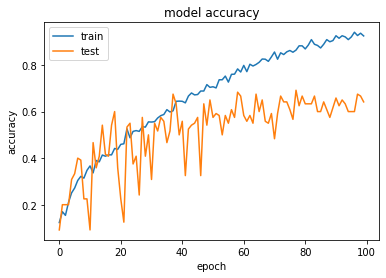

In [87]:
# Plotting the Train Valid Accuracy Graph

plt.plot(cnnhistory.history['categorical_accuracy'])
plt.plot(cnnhistory.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

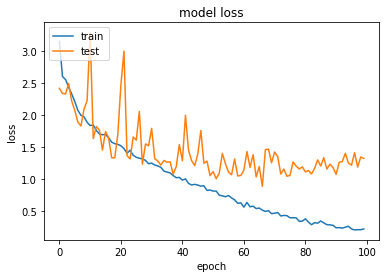

In [88]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model

In [89]:
#saving the model.json
import json
model_json=model.to_json()
with open("Audio_2DCNN_LogMelModel_4L.json","w") as json_file:
    json_file.write(model_json)

In [90]:
#loading json and creating model
from keras.models import model_from_json
json_file=open("Audio_2DCNN_LogMelModel_4L.json","r") 
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)

In [91]:
from keras.models import load_model
#Returns a compiled model identical to the previous one
loaded_model.load_weights('Audio_2DCNN_4L.h5')

In [92]:
#evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
score=loaded_model.evaluate(x_testcnn,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

acc: 69.17%


In [93]:
x_test_data=audios[(dataset_db['split']=='Test')]
y_test_data=dataset_db.emotion_lb[(dataset_db['split']=='Test')]
print(x_test_data.shape,y_test_data.shape)

(120, 128, 259, 1) (120,)


In [94]:
preds=loaded_model.predict(x_test_data,batch_size=16,verbose=1)
pred1=preds.argmax(axis=1)
abc=pred1.astype(int).flatten()
predictions=(lb.inverse_transform((abc)))

120/120 [==============================] - ETA: 58 - ETA: 30 - ETA: 22 - ETA: 15 - ETA: 9 - ETA:  - ETA:  - 27s 225ms/step


In [95]:
pred_df=pd.DataFrame({'predictedvalues':predictions})
pred_df[:10]

,predictedvalues
0,male_neutral
1,male_disgust
2,male_neutral
3,male_disgust
4,male_neutral
5,male_neutral
6,male_neutral
7,male_neutral
8,male_neutral
9,male_neutral


In [96]:
actual_df=pd.DataFrame({'actualvalues':y_test_data})
actual_df[:10]
actual_df.index=range(len(actual_df.index))

In [97]:
final_df=pd.concat([actual_df,pred_df],axis=1)
final_df.head()

,actualvalues,predictedvalues
0,male_neutral,male_neutral
1,male_neutral,male_disgust
2,male_neutral,male_neutral
3,male_neutral,male_disgust
4,male_neutral,male_neutral


In [98]:
import seaborn as sns
def print_confusion_matrix(confusion_matrix,class_names,figsize=(9,6),fontsize=14):
    df_cm=pd.DataFrame(confusion_matrix,index=class_names,columns=class_names,)
    fig=plt.figure(figsize=figsize)
    try:
        heatmap=sns.heatmap(df_cm,annot=True,fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right',fontsize=fontsize)
    plt.ylabel('True label')
    plt.ylabel('Predicted label')

In [99]:
from sklearn.metrics import accuracy_score
y_true=final_df.actualvalues
y_pred=final_df.predictedvalues
accuracy_score(y_true,y_pred)*100

55.833333333333336

In [100]:
from sklearn.metrics import f1_score
f1_score(y_true,y_pred,average='macro')*100

C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


48.112441946475556

In [101]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_true,y_pred)
c

array([[ 6,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  4,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  2,  2,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  2,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  7],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0, 10,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  1,  0,  4,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8]],
      dtype=int64)

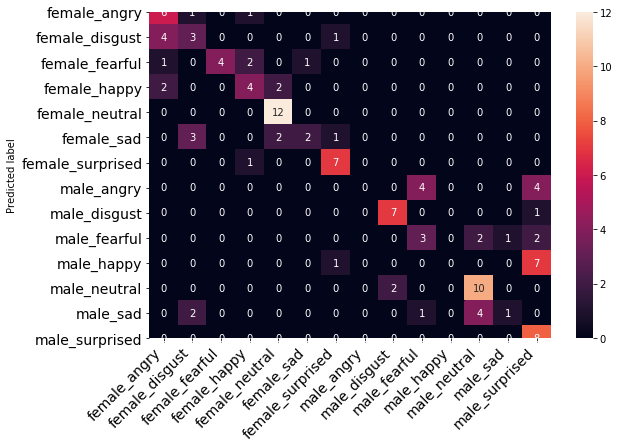

In [102]:
class_names=sorted(set(final_df.actualvalues))
print_confusion_matrix(c, class_names)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                  precision    recall  f1-score   support

    female_angry       0.46      0.75      0.57         8
  female_disgust       0.33      0.38      0.35         8
  female_fearful       1.00      0.50      0.67         8
    female_happy       0.50      0.50      0.50         8
  female_neutral       0.75      1.00      0.86        12
      female_sad       0.67      0.25      0.36         8
female_surprised       0.70      0.88      0.78         8
      male_angry       0.00      0.00      0.00         8
    male_disgust       0.78      0.88      0.82         8
    male_fearful       0.38      0.38      0.38         8
      male_happy       0.00      0.00      0.00         8
    male_neutral       0.62      0.83      0.71        12
        male_sad       0.50      0.12      0.20         8
  male_surprised       0.36      1.00      0.53         8

        accuracy                           0.56       120
       macro avg       0.50      0.53      0.48       120
    weighted